<a href="https://colab.research.google.com/github/liminovna/DataViz_R_notebooks/blob/main/R_assgnt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW5: Correspondence analysis

```
Работа Ли-Мин Вадиславы
```

In [1]:
if (!require("skimr")) install.packages("skimr")

Loading required package: skimr



In [2]:
library(tidyverse)
library(skimr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
infinitives <- read_tsv("https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/PeriphrasticFutureMidRussian.txt", col_names = TRUE) %>%
  as.data.frame() %>%
    select(!ends_with("_Imp")) %>%
      select(!быти_Lform)

Rows: 23 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): INF
dbl (24): быти_Fut, быти_Lform, мочи_Aor, мочи_Imp, мочи_Lform, мочи_Pres, н...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Проверка датасета

Пользуясь столбцом INF, дайте имя каждому ряду таблицы сопряженности (с помощью функции row.names или column_to_rownames). Оставьте в таблице только целочисленные данные. Выведите первые 6 строк таблицы. Проверьте, что таблица не содержит missing data.


In [4]:
# превращаем столбец INF в индекс
infinitives <- column_to_rownames(infinitives, 'INF')

In [5]:
# проверяем, нет ли пропущенных данных
sum(is.na(infinitives))

[1] 0

In [6]:
top_n(infinitives, 6)

Selecting by хотѣти_Pres


,быти_Fut,мочи_Aor,мочи_Lform,мочи_Pres,начати_Aor,начати_Fut,начати_Lform,почати_Aor,почати_Fut,почати_Lform,стати_Aor,стати_Fut,стати_Lform,учати_Aor,учати_Fut,учати_Lform,хотѣти_Aor,хотѣти_Lform,хотѣти_Pres
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
быти,0,0,3,32,12,0,0,4,0,6,0,0,0,0,4,3,0,3,46
держати,2,1,0,5,8,0,0,1,0,1,0,3,2,0,19,3,0,0,21
жаловати,1,0,0,0,5,1,0,0,2,2,0,0,1,0,7,1,0,0,31
итти,11,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,12,21,67
послати,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,33,22
служити,6,0,1,4,5,1,0,0,0,2,0,7,1,0,17,2,0,3,27


## Chisq test

Примените тест Хи-квадрат Пирсона к таблице сопряженности.

Постройте таблицу с ожидаемыми значениями для таблицы сопряженности.

Предложите анализ теста Хи-квадрат. Что можно сказать об ассоциации между конструкциями (они обозначены вспомогательными глаголами в той или иной временной форме) и инфинитивами? Какие проблемы вы видите в применении теста Хи-квадрат к этим данным?

In [7]:
# применяем тест Хи-квадрат Пирсона
infinitives_chisq <- chisq.test(infinitives)
infinitives_chisq

Warning message in chisq.test(infinitives):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  infinitives
X-squared = 4569.9, df = 396, p-value < 2.2e-16


**Статистическая интерпретация p-value**

P-value меньше 0.05, а значит, при 5%-ом уровне значимости мы имеем основания отвергнуть нулевую гипотезу о независимости употребления вспомогательных глаголов и инфинитивов.

**Содержательная интерпретация**

Выбор начинательного глагола зависит от следующего за ним инфинитива.

In [8]:
# проверяем пропущенные значения
sum(is.na(infinitives))

[1] 0

In [9]:
# Таблица с ожидаемыми значениями
infinitives_chisq$expected

,быти_Fut,мочи_Aor,мочи_Lform,мочи_Pres,начати_Aor,начати_Fut,начати_Lform,почати_Aor,почати_Fut,почати_Lform,стати_Aor,стати_Fut,стати_Lform,учати_Aor,учати_Fut,учати_Lform,хотѣти_Aor,хотѣти_Lform,хотѣти_Pres
бити,30.536356,0.9366980,2.4354149,12.083405,36.531223,3.5594525,0.4683490,2.9037639,0.9366980,11.989735,0.37467921,9.460650,7.961933,0.09366980,38.029940,10.303678,2.3417451,13.113772,34.938837
быти,15.756202,0.4833191,1.2566296,6.234816,18.849444,1.8366125,0.2416595,1.4982891,0.4833191,6.186484,0.19332763,4.881523,4.108212,0.04833191,19.622754,5.316510,1.2082977,6.766467,18.027802
воевати,7.250642,0.2224123,0.5782720,2.869119,8.674080,0.8451668,0.1112062,0.6894782,0.2224123,2.846878,0.08896493,2.246364,1.890505,0.02224123,9.029940,2.446536,0.5560308,3.113772,8.295979
глаголати,15.477331,0.4747648,1.2343884,6.124465,18.515825,1.8041061,0.2373824,1.4717707,0.4747648,6.076989,0.18990590,4.795124,4.035500,0.04747648,19.275449,5.222412,1.1869119,6.646707,17.708725
говорити,47.826347,1.4670659,3.8143713,18.925150,57.215569,5.5748503,0.7335329,4.5479042,1.4670659,18.778443,0.58682635,14.817365,12.470060,0.14670659,59.562874,16.137725,3.6676647,20.538922,54.721557
дати,8.226689,0.2523524,0.6561163,3.255346,9.841745,0.9589393,0.1261762,0.7822926,0.2523524,3.230111,0.10094098,2.548760,2.144996,0.02523524,10.245509,2.775877,0.6308811,3.532934,9.412746
держати,9.202737,0.2822926,0.7339607,3.641574,11.009410,1.0727117,0.1411463,0.8751069,0.2822926,3.613345,0.11291702,2.851155,2.399487,0.02822926,11.461078,3.105218,0.7057314,3.952096,10.529512
дѣлати,14.361848,0.4405475,1.1454234,5.683062,17.181352,1.6740804,0.2202737,1.3656972,0.4405475,5.639008,0.17621899,4.449530,3.744654,0.04405475,17.886228,4.846022,1.1013687,6.167665,16.432421
жаловати,7.111206,0.2181352,0.5671514,2.813944,8.507271,0.8289136,0.1090676,0.6762190,0.2181352,2.792130,0.08725406,2.203165,1.854149,0.02181352,8.856287,2.399487,0.5453379,3.053892,8.136441
жити,30.954662,0.9495295,2.4687767,12.248931,37.031651,3.6082121,0.4747648,2.9435415,0.9495295,12.153978,0.37981180,9.590248,8.071001,0.09495295,38.550898,10.444825,2.3738238,13.293413,35.417451


Команда `chisq.test(infinitives)` вызывает предупреждение `Chi-squared approximation may be incorrect`, поскольку некоторые ожидаемые значения меньше 5. Это связано с тем, что тест хи-квадрат следует непрерывному распределению, но на малых выборках статистики не распределены непрерывно.

## Baloon plot

С помощью функции `balloonplot` визуализируем данные в таблице сопряженности.

In [10]:
if (!require("gplots")) install.packages("gplots")
library("gplots")

Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




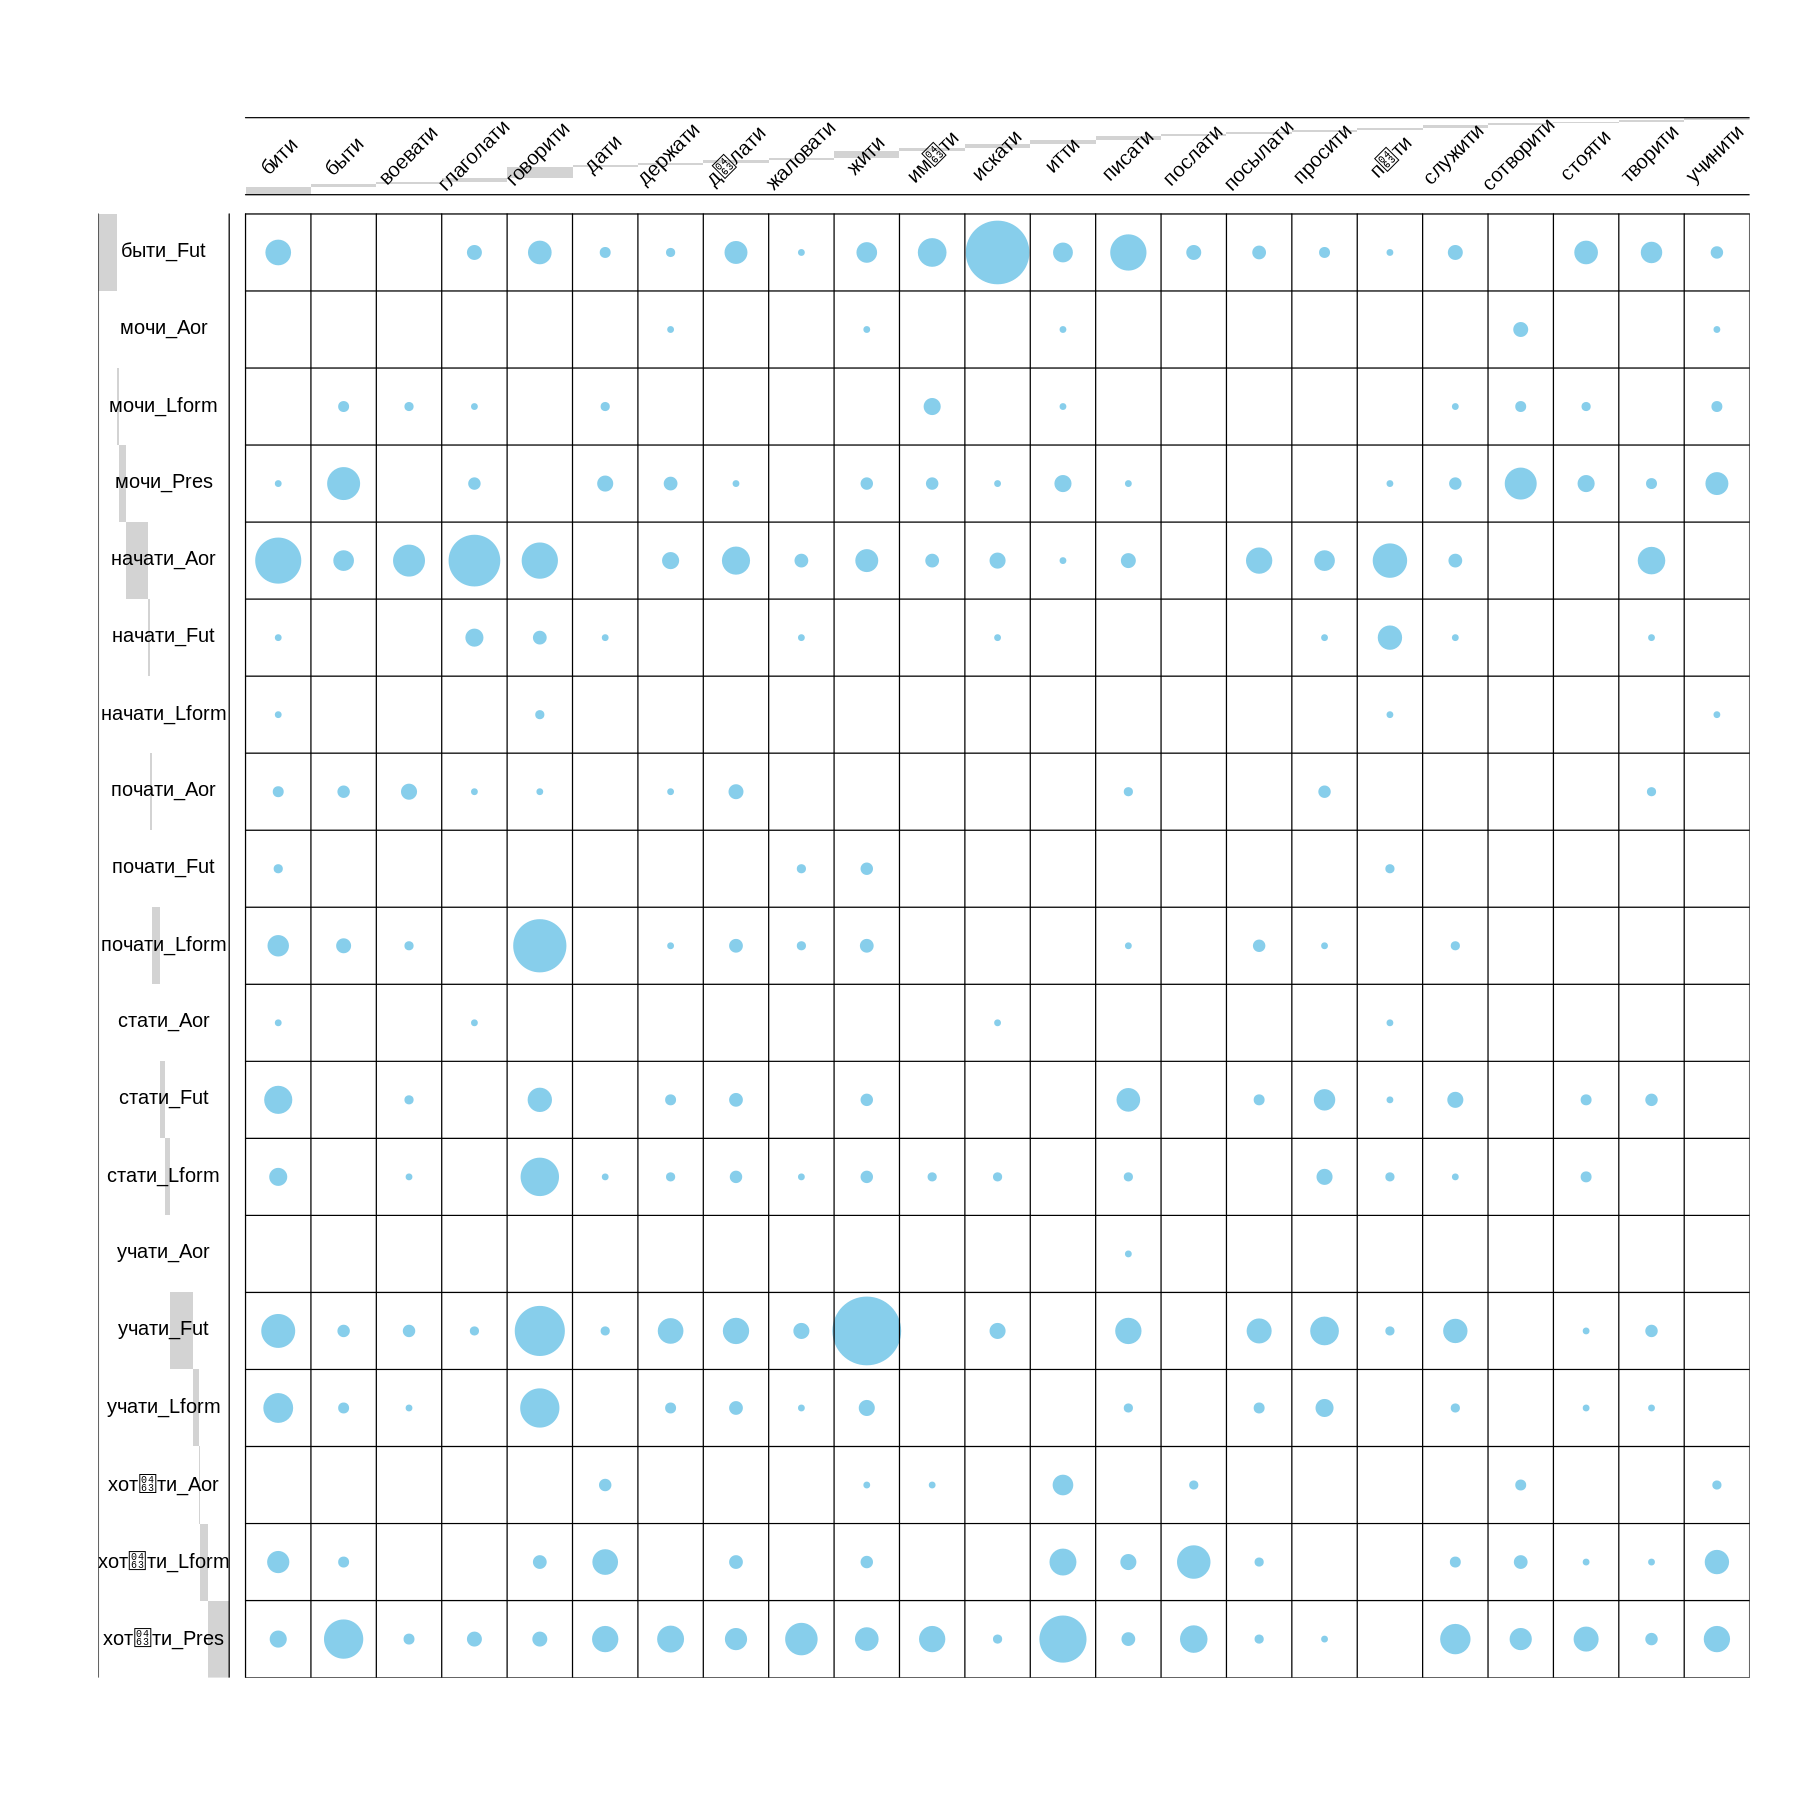

In [11]:
options(repr.plot.width=15, repr.plot.height=15)


infinitives |> as.matrix() |> as.table() |>
  balloonplot(main ="", xlab ="", ylab="",
              label = FALSE, show.margins = FALSE, colsrt=45, dotsize=10)

## Хи-квадрат на меньшей таблице

Оставьте меньшее количество строк и столбцов в таблице (вы можете убирать те или иные столбцы или объединять данные из нескольких столбцов или строк). Результирующая таблица должна быть размером не меньше 3 x 3 и корректна для проведения теста Хи-квадрат. Проведите снова тест Хи-квадрат и запишите ваши выводы.

Вычислите величину эффекта для теста с помощью V Крамера.

Визуализируйте таблицу с помощью мозаичного графика.

Запишите ваши выводы по ассоциации данных в меньшей таблице.

In [12]:
# группируем столбцы и суммируем значения
infinitives_grouped <- infinitives %>%
  rownames_to_column(var = "INF") %>%
  pivot_longer(cols=-INF, names_to = ".value",
               names_pattern = "(.*?)_") %>%
  mutate(быти = replace_na(быти, 0)) %>%
  group_by(INF) %>%
  summarise(across(everything(), sum)) %>%
  column_to_rownames('INF')
infinitives_grouped

,быти,мочи,начати,почати,стати,учати,хотѣти
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
бити,19,1,66,18,33,60,22
быти,0,35,12,10,0,7,49
воевати,0,2,30,9,3,5,3
глаголати,6,5,90,1,1,2,6
говорити,16,0,46,87,61,122,11
дати,3,9,1,0,1,2,43
держати,2,6,8,2,5,22,21
дѣлати,15,1,23,11,9,25,19
жаловати,1,0,6,4,1,8,31


In [13]:
# берем строки, где минимальное значение > 5
infinitives_short <- infinitives_grouped[c("бити","говорити","дѣлати","жити"),c("быти","начати","почати","стати","учати","хотѣти")]
infinitives_short

,быти,начати,почати,стати,учати,хотѣти
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
бити,19,66,18,33,60,22
говорити,16,46,87,61,122,11
дѣлати,15,23,11,9,25,19
жити,12,15,9,8,152,21


In [14]:
infinitives_short_chisq <- chisq.test(infinitives_short)
infinitives_short_chisq


	Pearson's Chi-squared test

data:  infinitives_short
X-squared = 216.82, df = 15, p-value < 2.2e-16


Уменьшился хи-квадрат и степень свободы, а p-value осталось прежним. Следовательно нулевую гипотезу о независимости вспомогательных глаголов и инфинитивов мы по-прежнему можем отвергнуть.

In [15]:
if (!require("lsr")) install.packages("lsr")
library(lsr)

Loading required package: lsr



In [16]:
# Вычисление величины эффекта для теста с помощью V Крамера.
lsr::cramersV(infinitives_short)

[1] 0.2865823

In [17]:
if (!require("vcd")) install.packages("vcd")

Loading required package: vcd

Loading required package: grid



In [18]:
infinitives_short

,быти,начати,почати,стати,учати,хотѣти
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
бити,19,66,18,33,60,22
говорити,16,46,87,61,122,11
дѣлати,15,23,11,9,25,19
жити,12,15,9,8,152,21


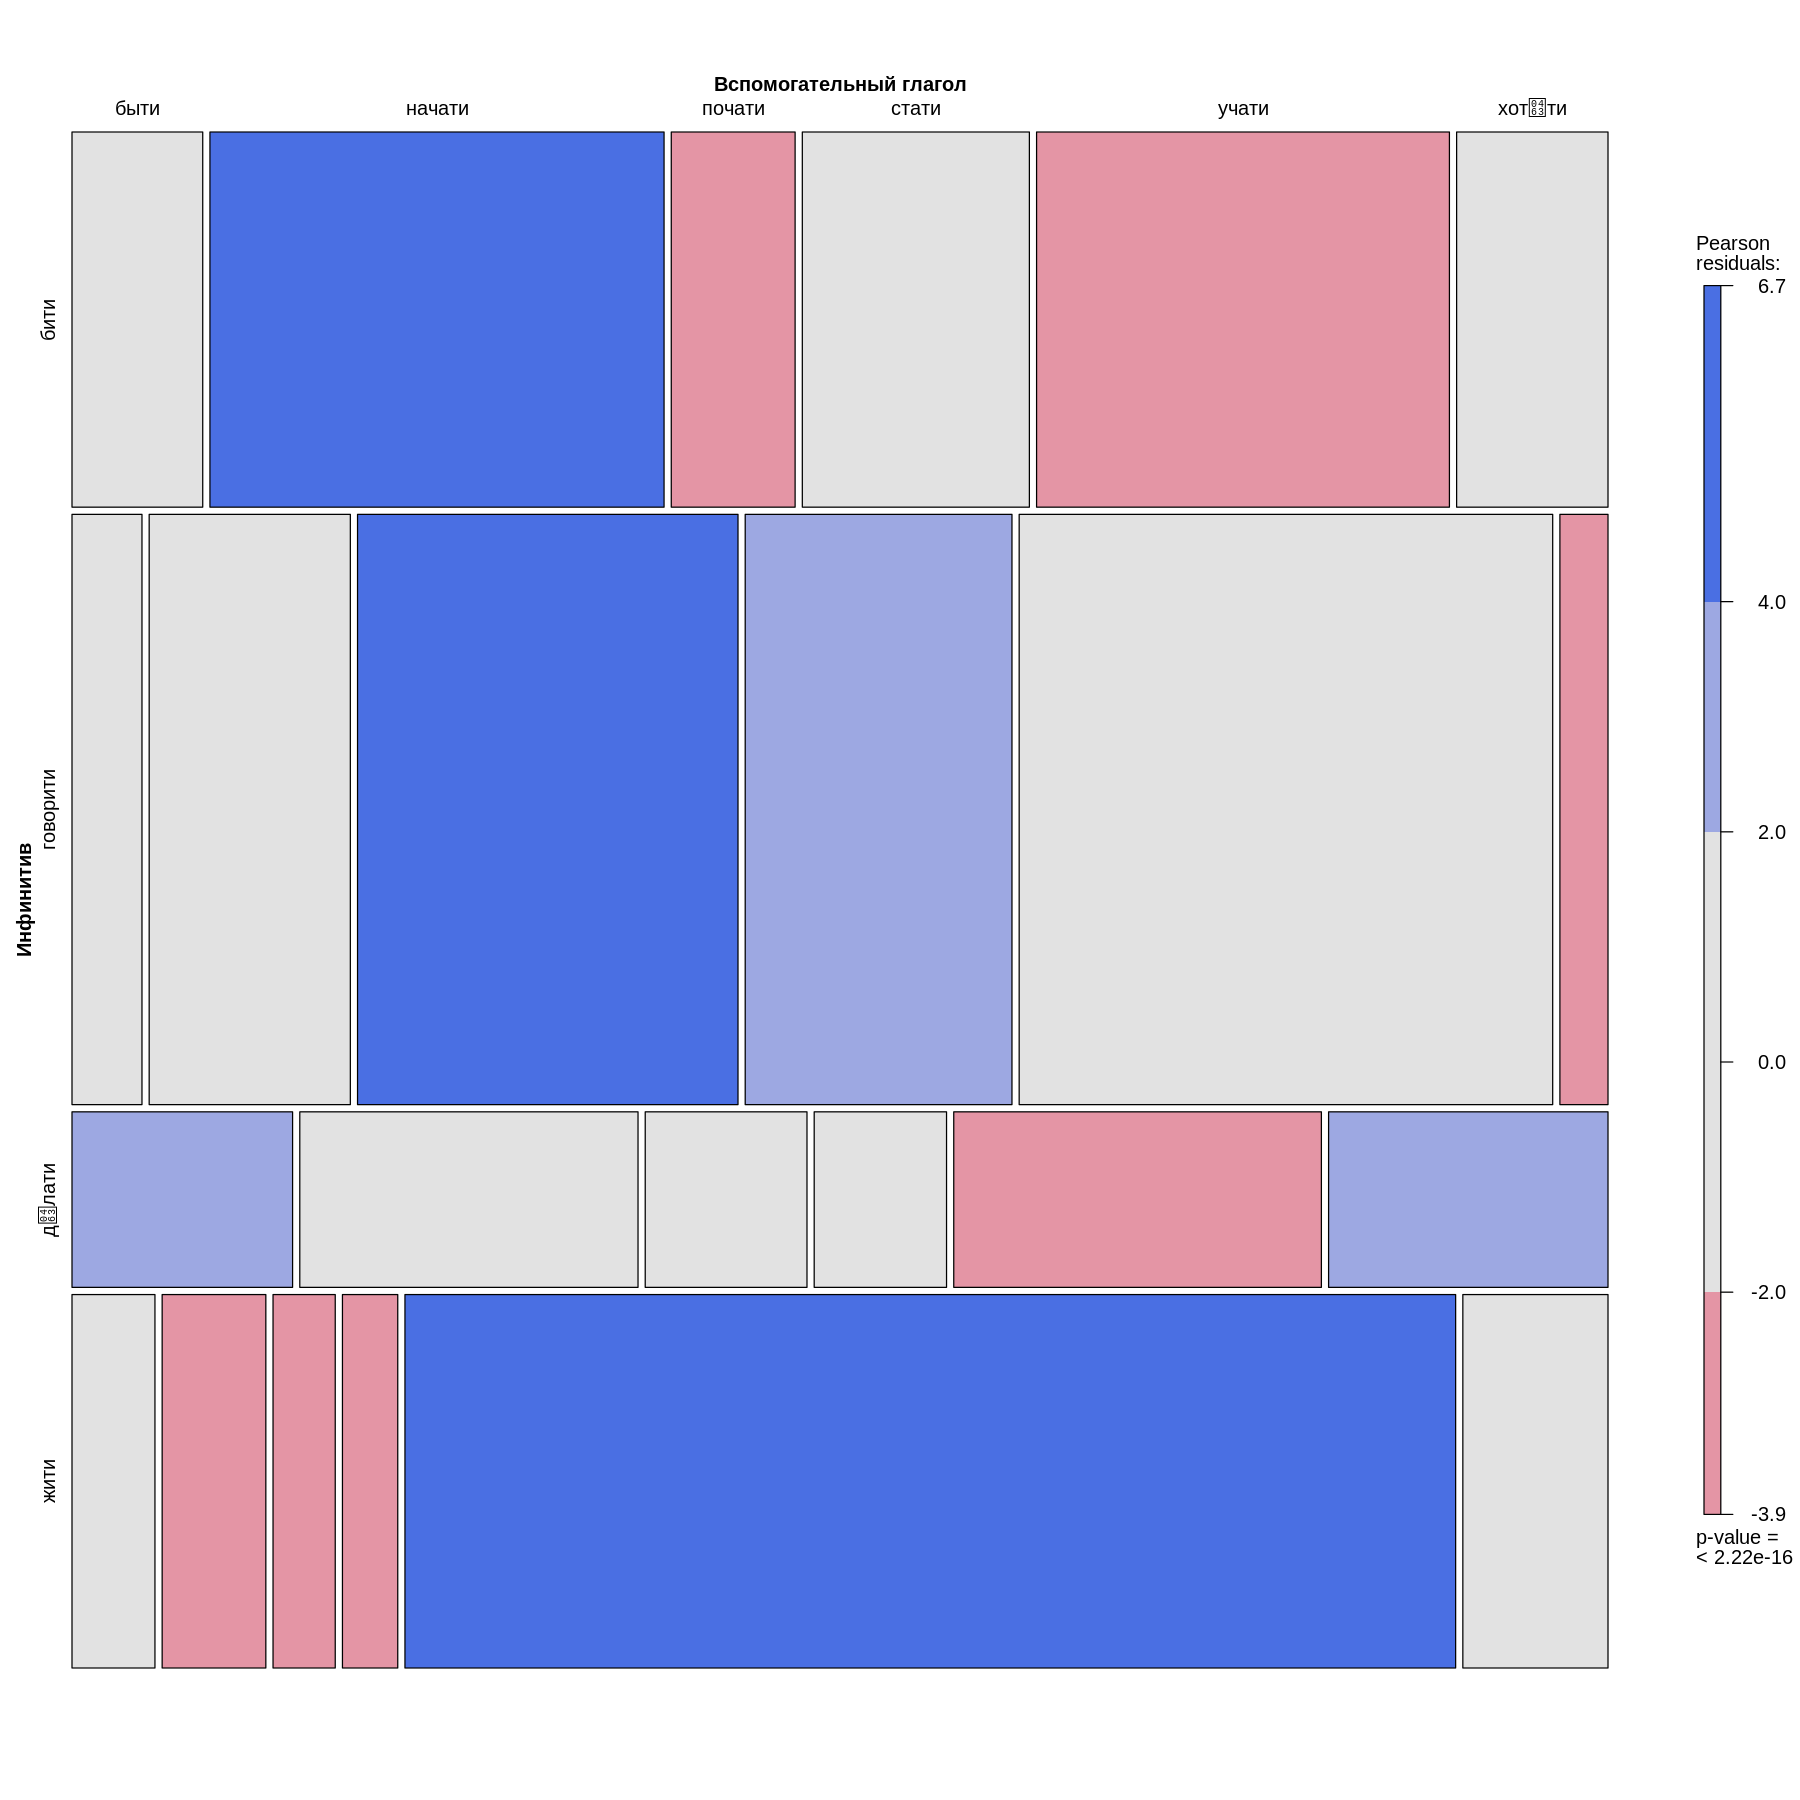

In [19]:
# Мозаичный график
library('vcd')

vcd::mosaic(
  infinitives_short_chisq$observed,
  set_varnames = list(A = "Инфинитив", B = "Вспомогательный глагол"),
  shade = TRUE
)

## Интерактивная тепловая карта

Вернемся к полной таблице сопряженности. Используйте функцию heatmaply для интерактивной визуализации ассоциации между строками и столбцами.

*кажется, что интерактивные виджеты не работают в колабе, поэтому оставляю неинтерактивную версию. Но интерактивная тепловая карта построилась без проблем в r studio с помощью команды `heatmaply(infinitives)`

In [20]:
if (!require("pheatmap")) install.packages("pheatmap")
library(pheatmap)

Loading required package: pheatmap



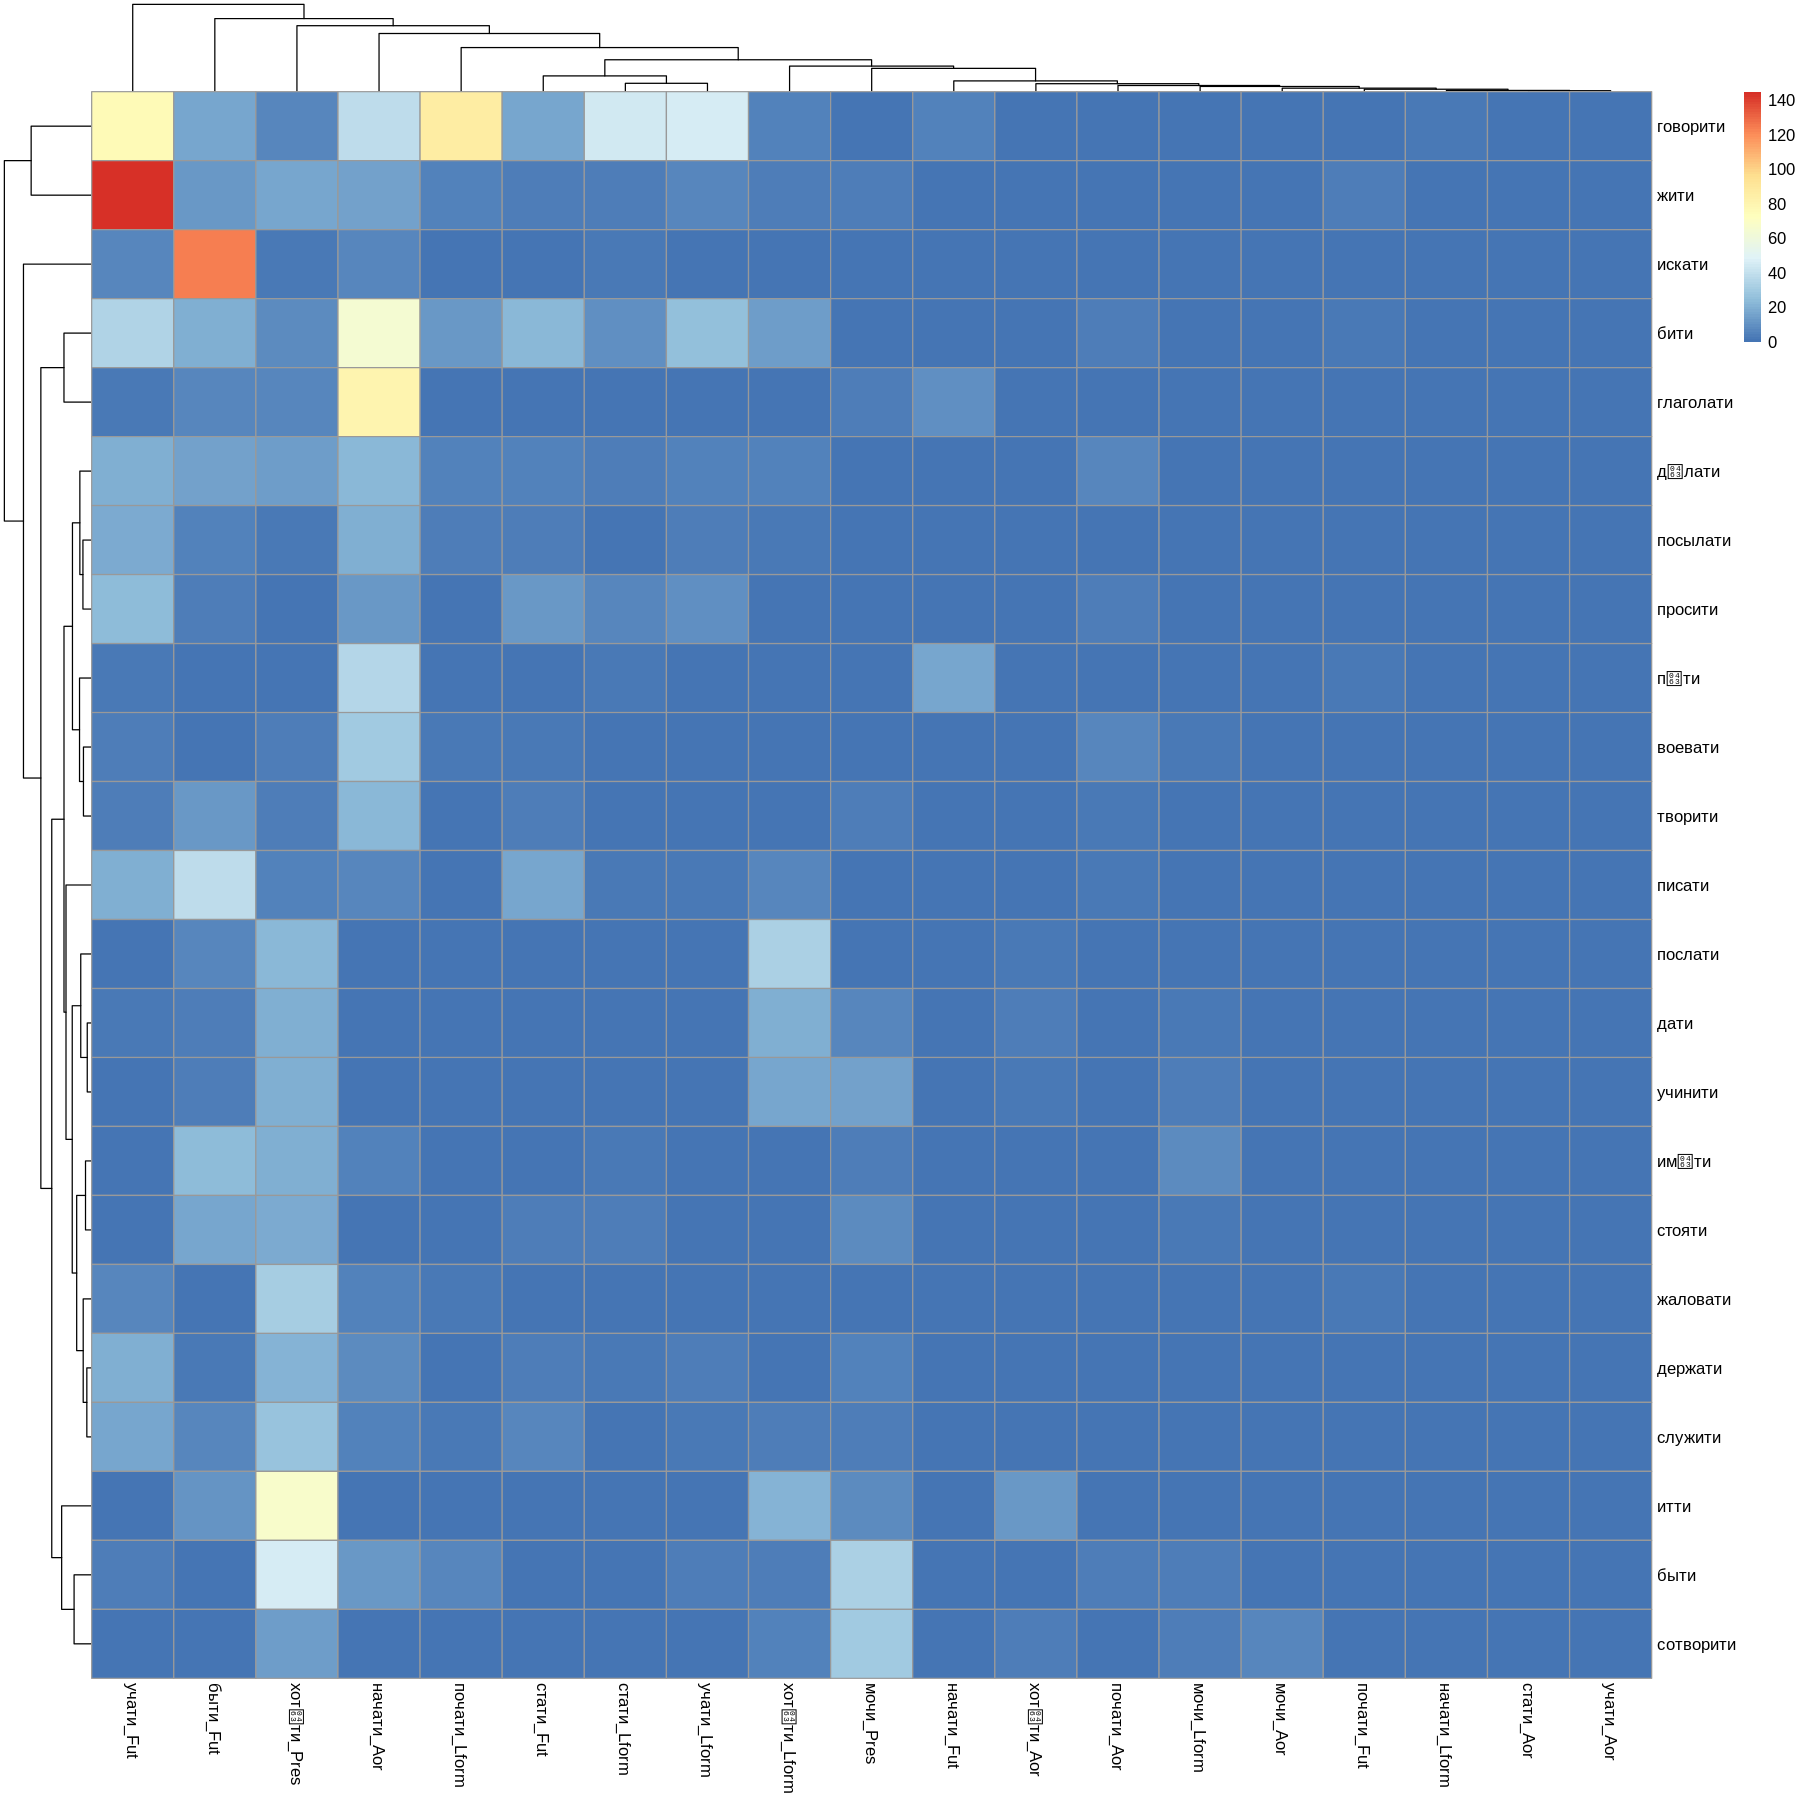

In [21]:
png("heatmap.png", width = 800, height = 600)
pheatmap(as.matrix(infinitives))

## Анализ соответствий

В этом разделе мы предлагаем использовать пакеты factoextra и FactoMineR, но вы можете использовать и другие пакеты R. Постройте модель анализа соответствий и запишите ее в переменную ca.model. Выведите summary модели.

In [22]:
if (!require("factoextra")) install.packages("factoextra")
library(factoextra)

if (!require("FactoMineR")) install.packages("FactoMineR")
library(FactoMineR)

Loading required package: factoextra

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: FactoMineR



Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


**Results of the Correspondence Analysis (CA)**
The row variable has  23  categories; the column variable has 19 categories
The chi square of independence between the two variables is equal to 4569.931 (p-value =  0 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         

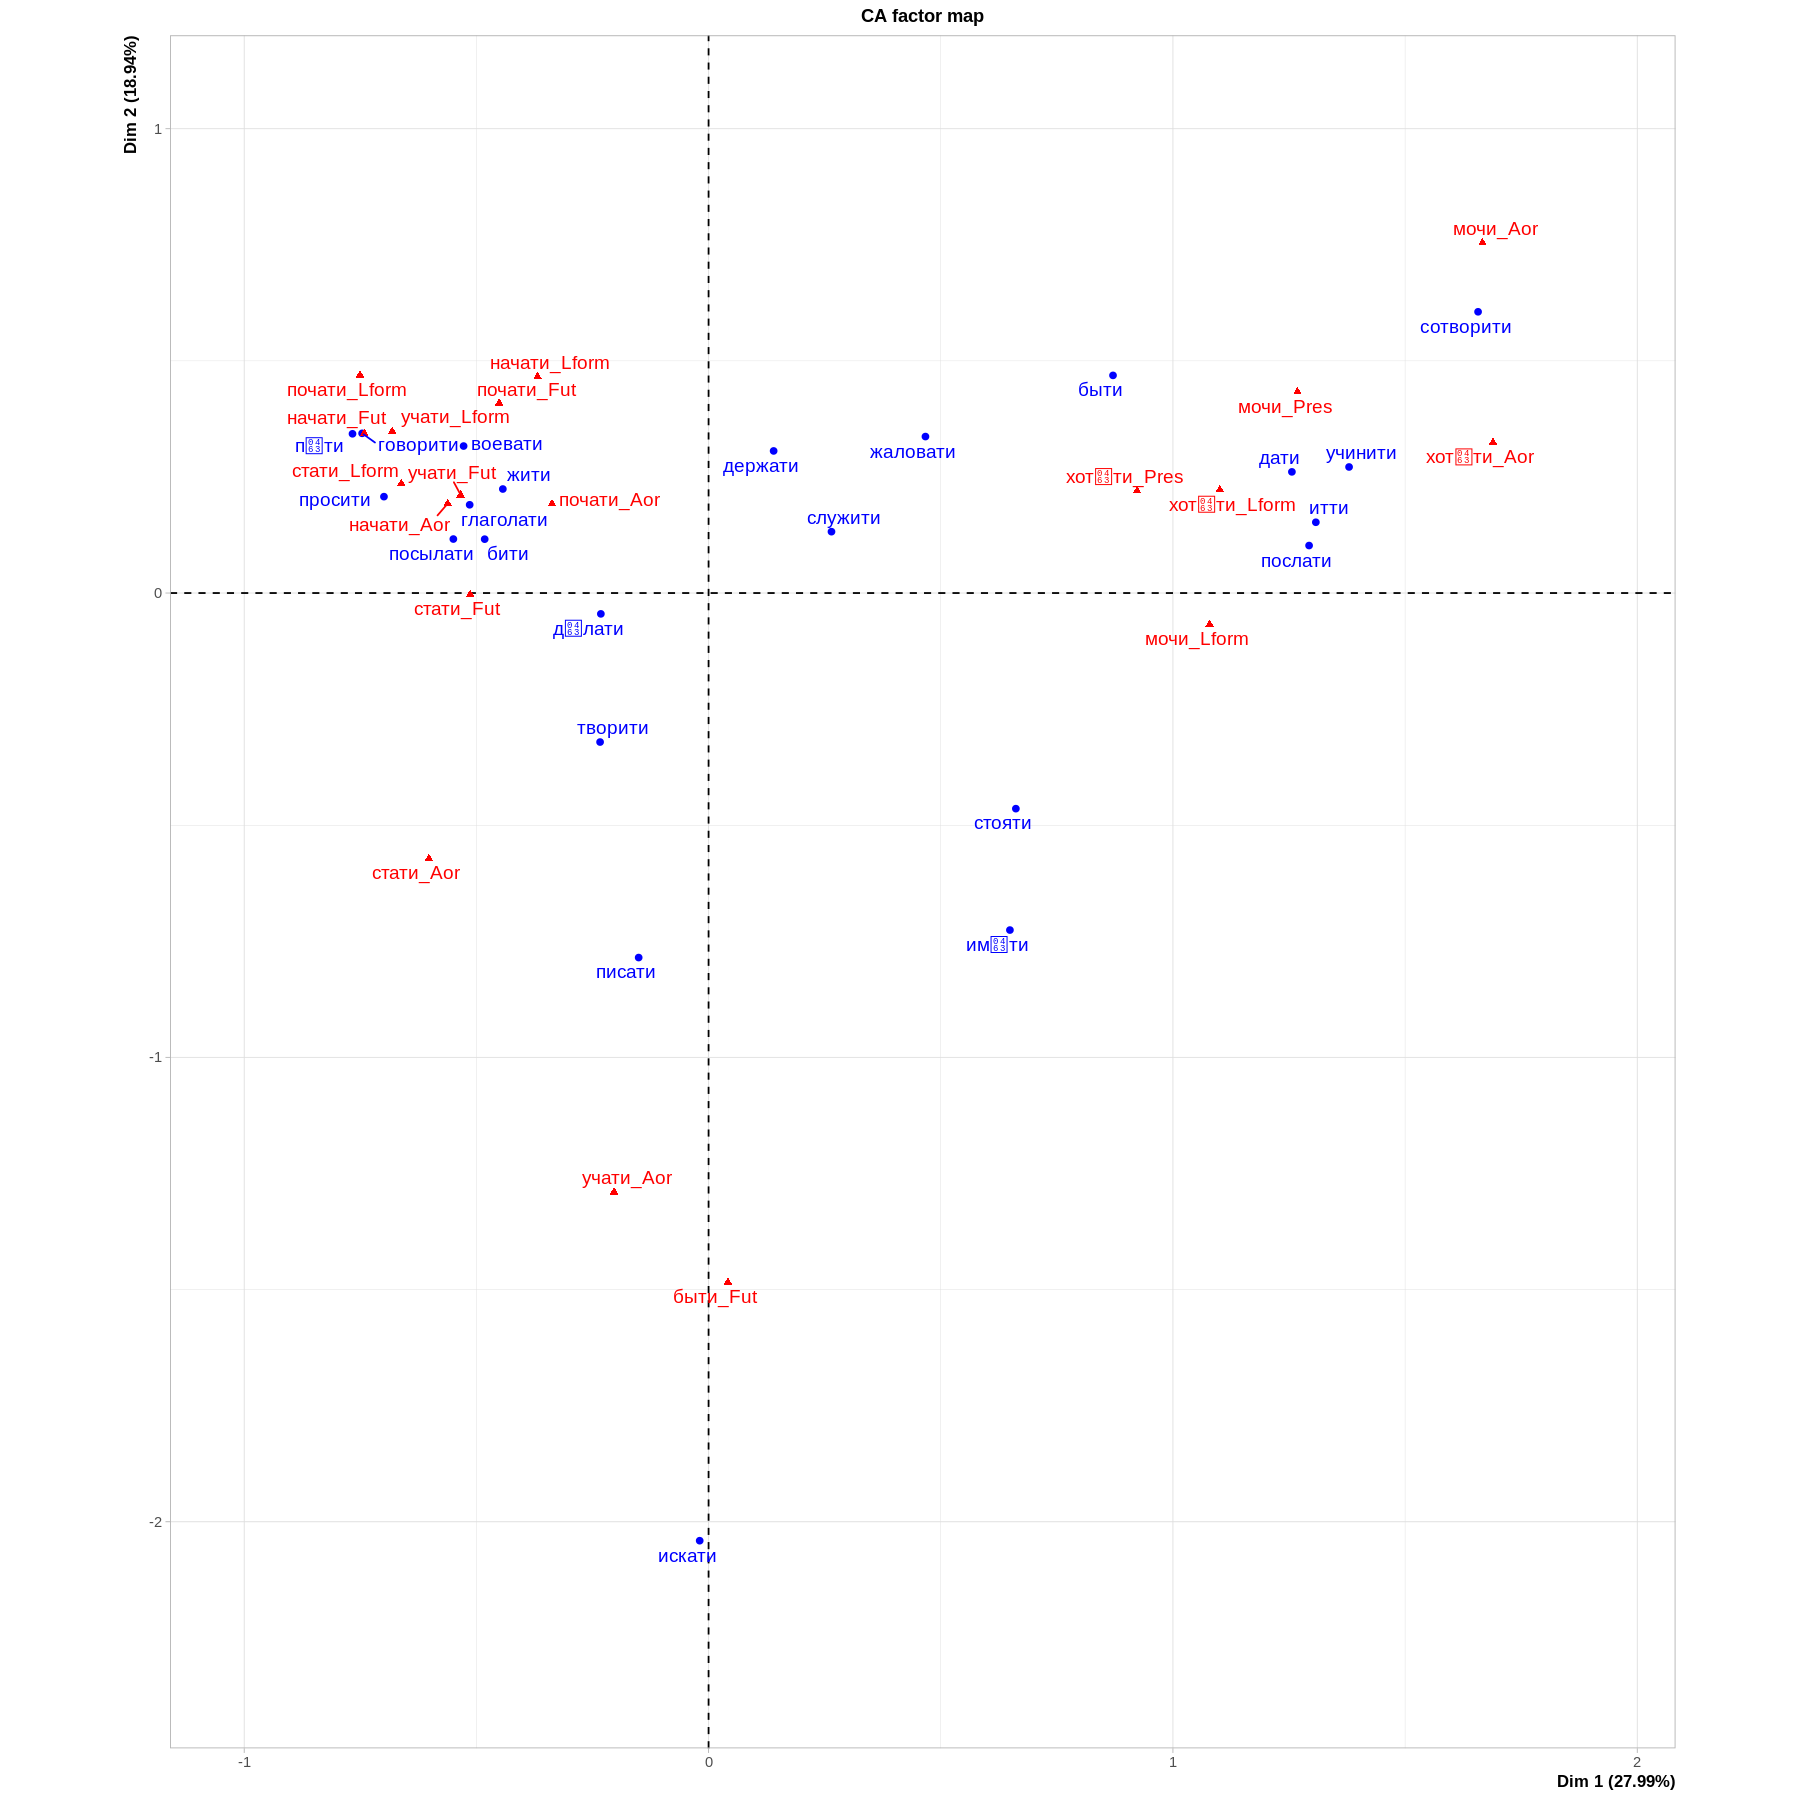

In [23]:
ca.model <- FactoMineR::CA(infinitives, ncp = 5, graph = TRUE)
ca.model

In [24]:
print(ca.model)

**Results of the Correspondence Analysis (CA)**
The row variable has  23  categories; the column variable has 19 categories
The chi square of independence between the two variables is equal to 4569.931 (p-value =  0 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         


## Screeplot

Визуализируйте screeplot.

Запишите ваши выводы, какую долю объясненной дисперсии представляют первые два измерения?

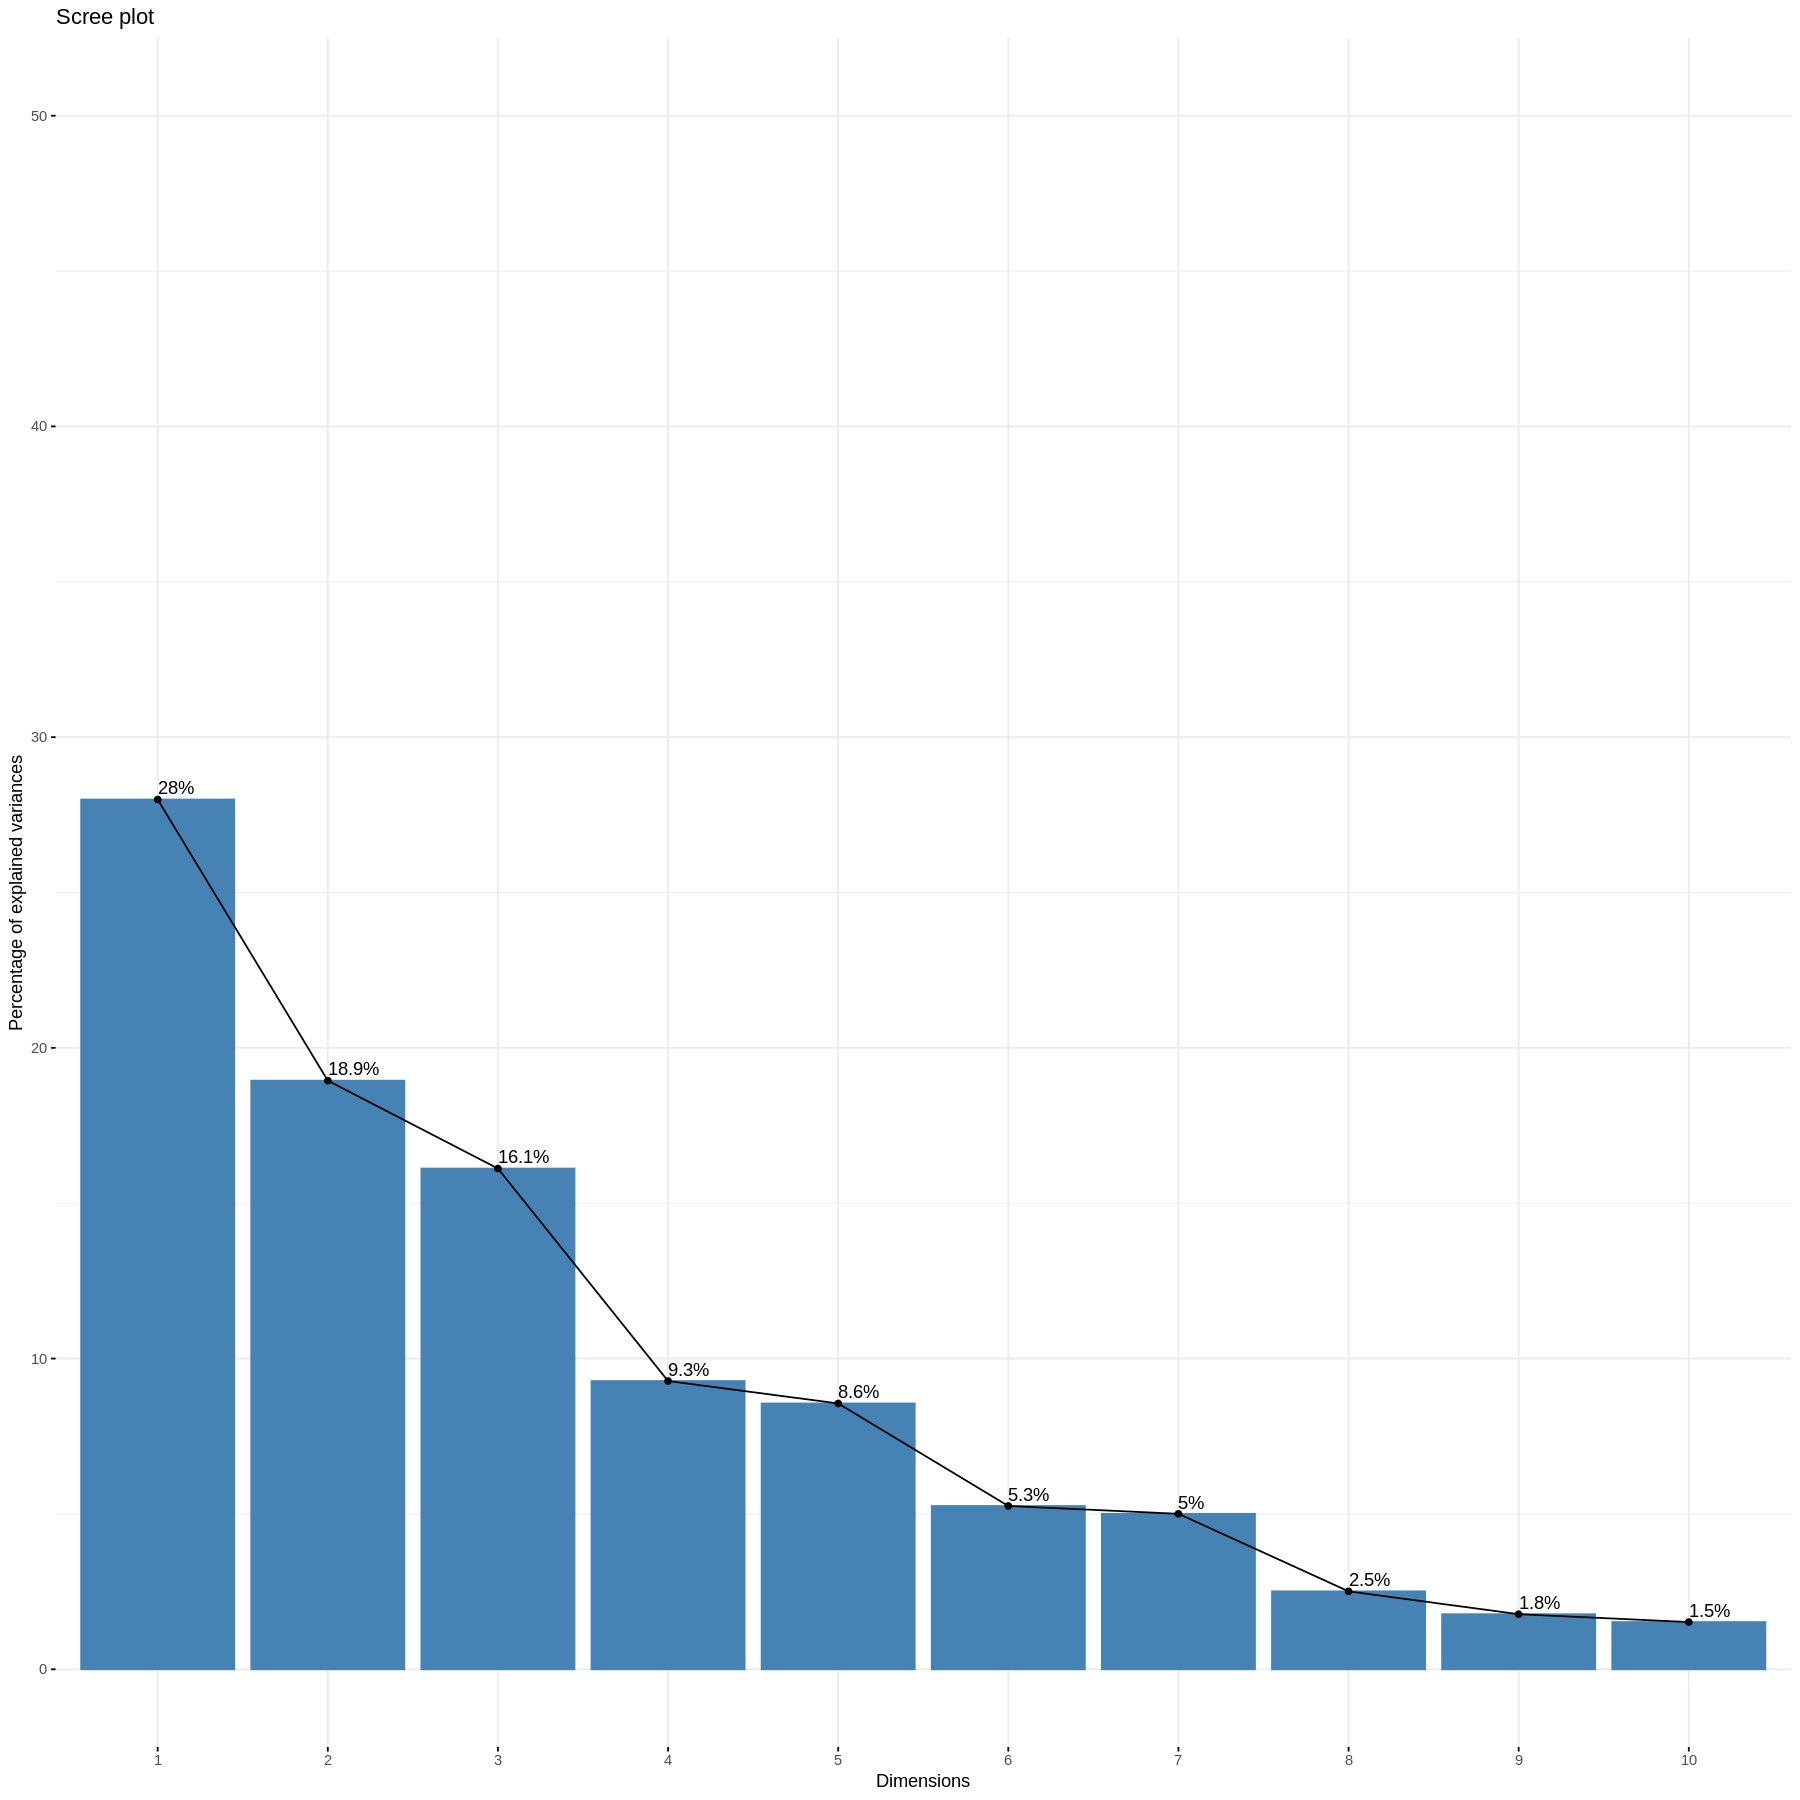

In [25]:
factoextra::fviz_screeplot(ca.model, addlabels = TRUE, ylim = c(0, 50))

Первые два измерения представляют 47% объясненной дисперсии.

## Biplot

Постройте базовый биплот.

Постройте плот для данных в столбцах. Цвет должен отражать сontribution каждого конкретного столбца.

Здесь вы можете построить более продвинутый биплот с использованием цвета, прозрачности, repel.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


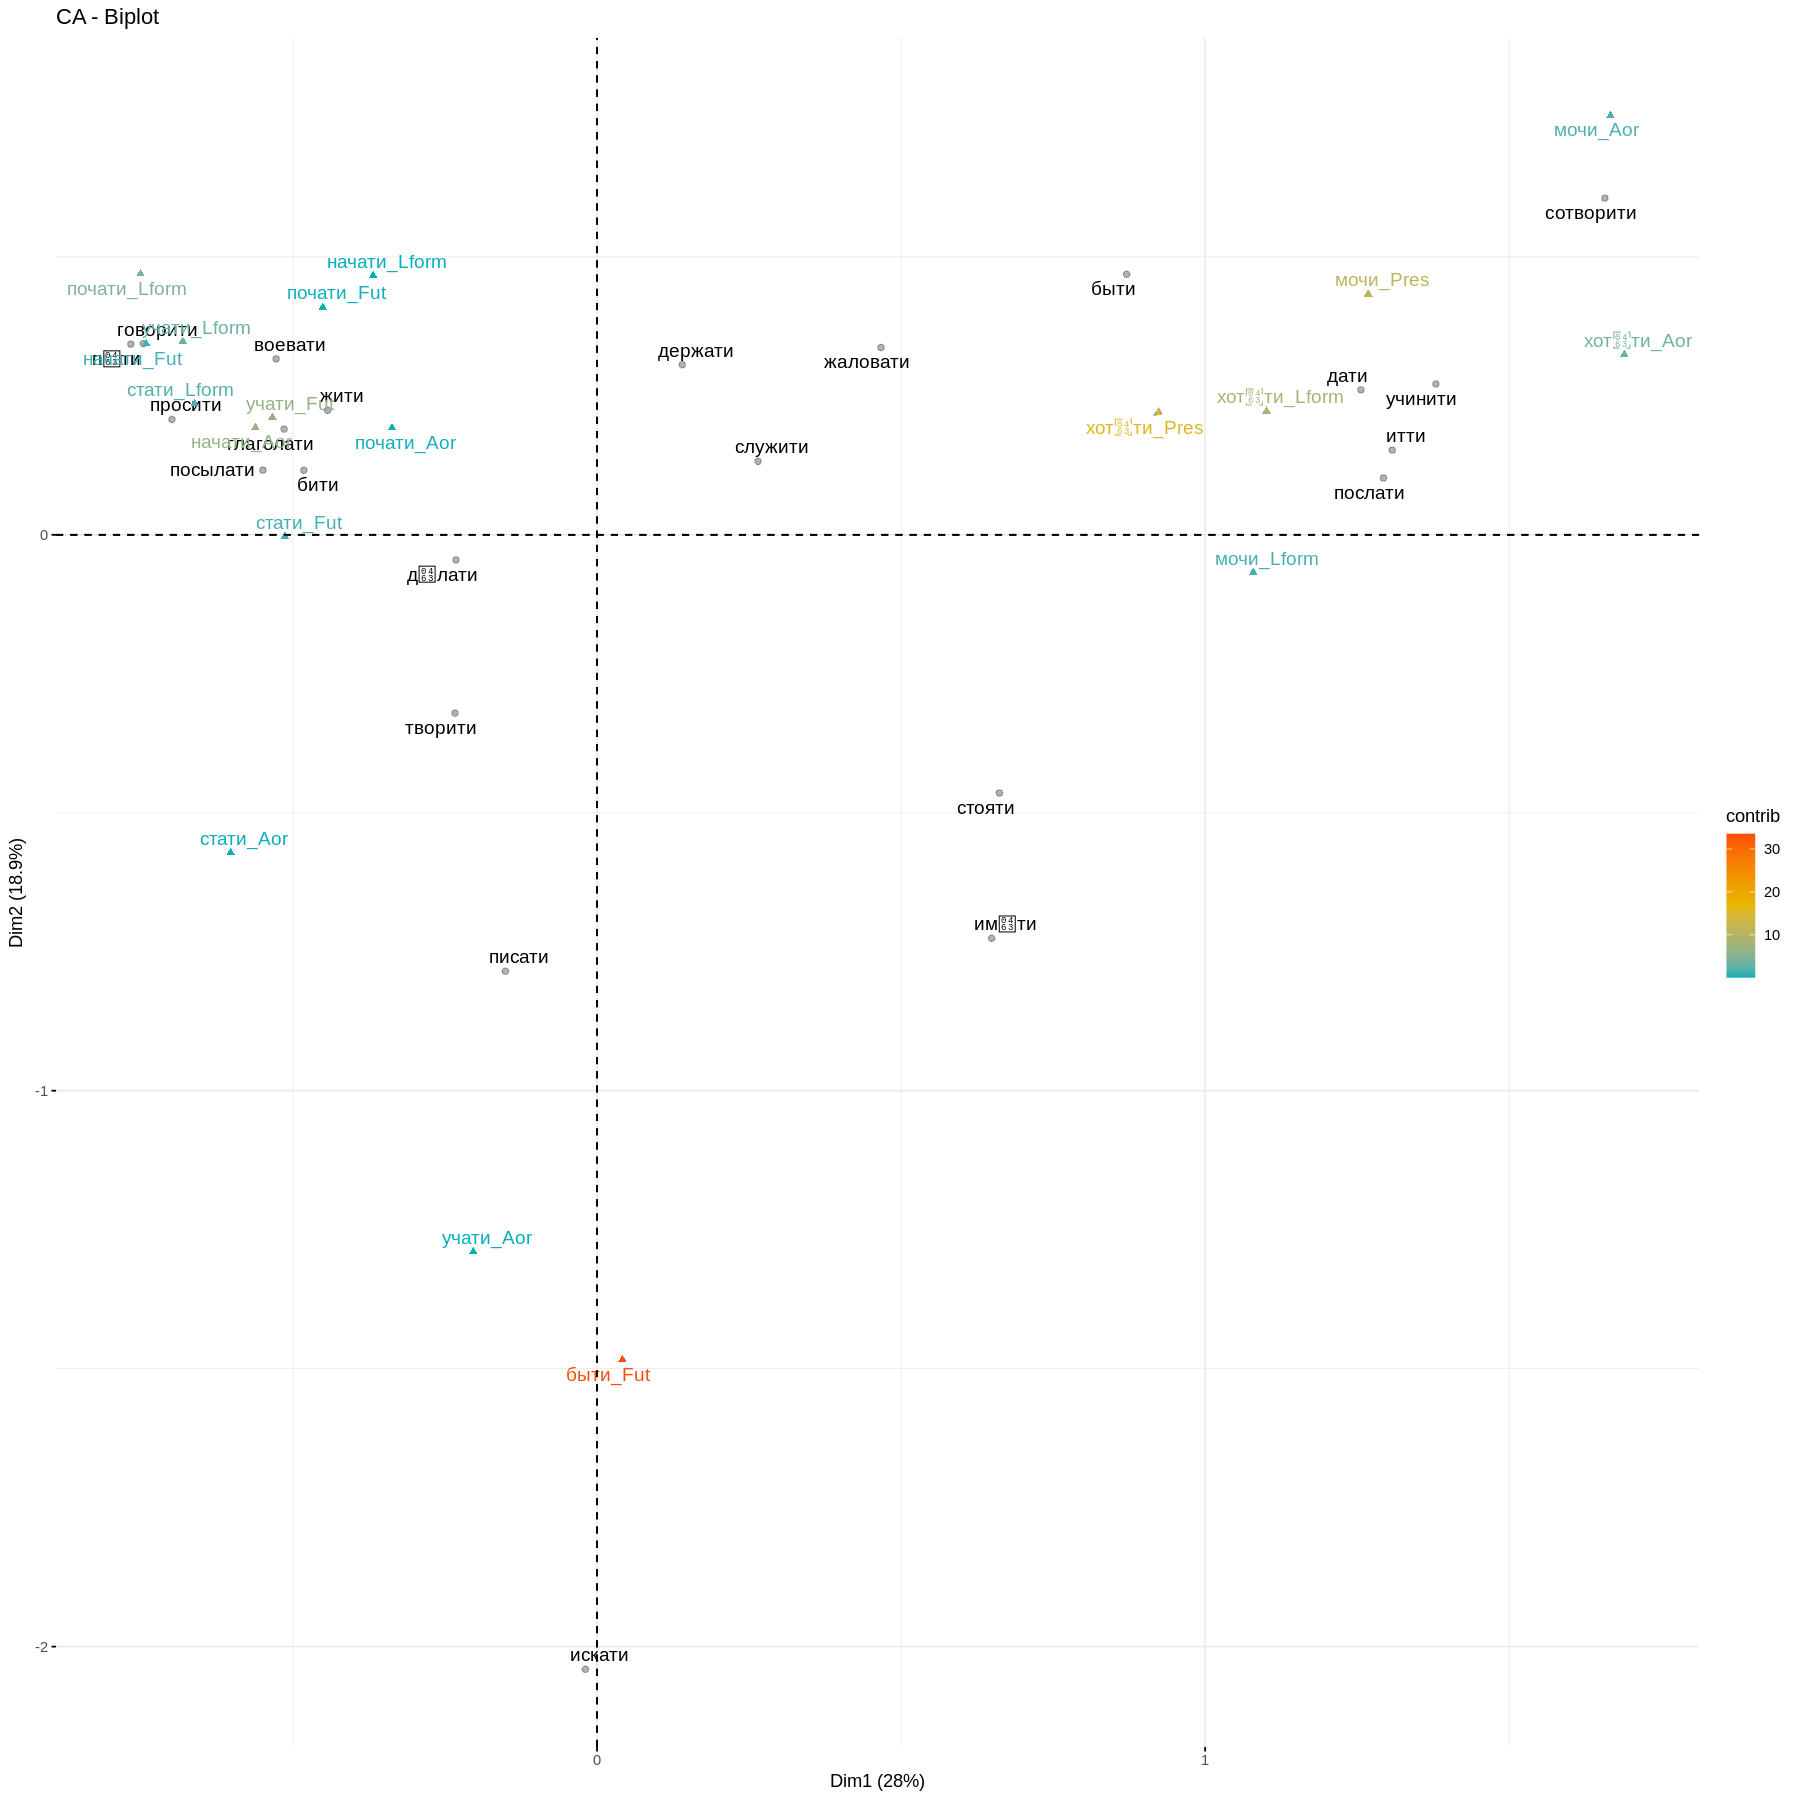

In [26]:
factoextra::fviz_ca_biplot(ca.model, col.col="contrib", col.row = "black", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE, alpha.col=1, alpha.row=0.3)

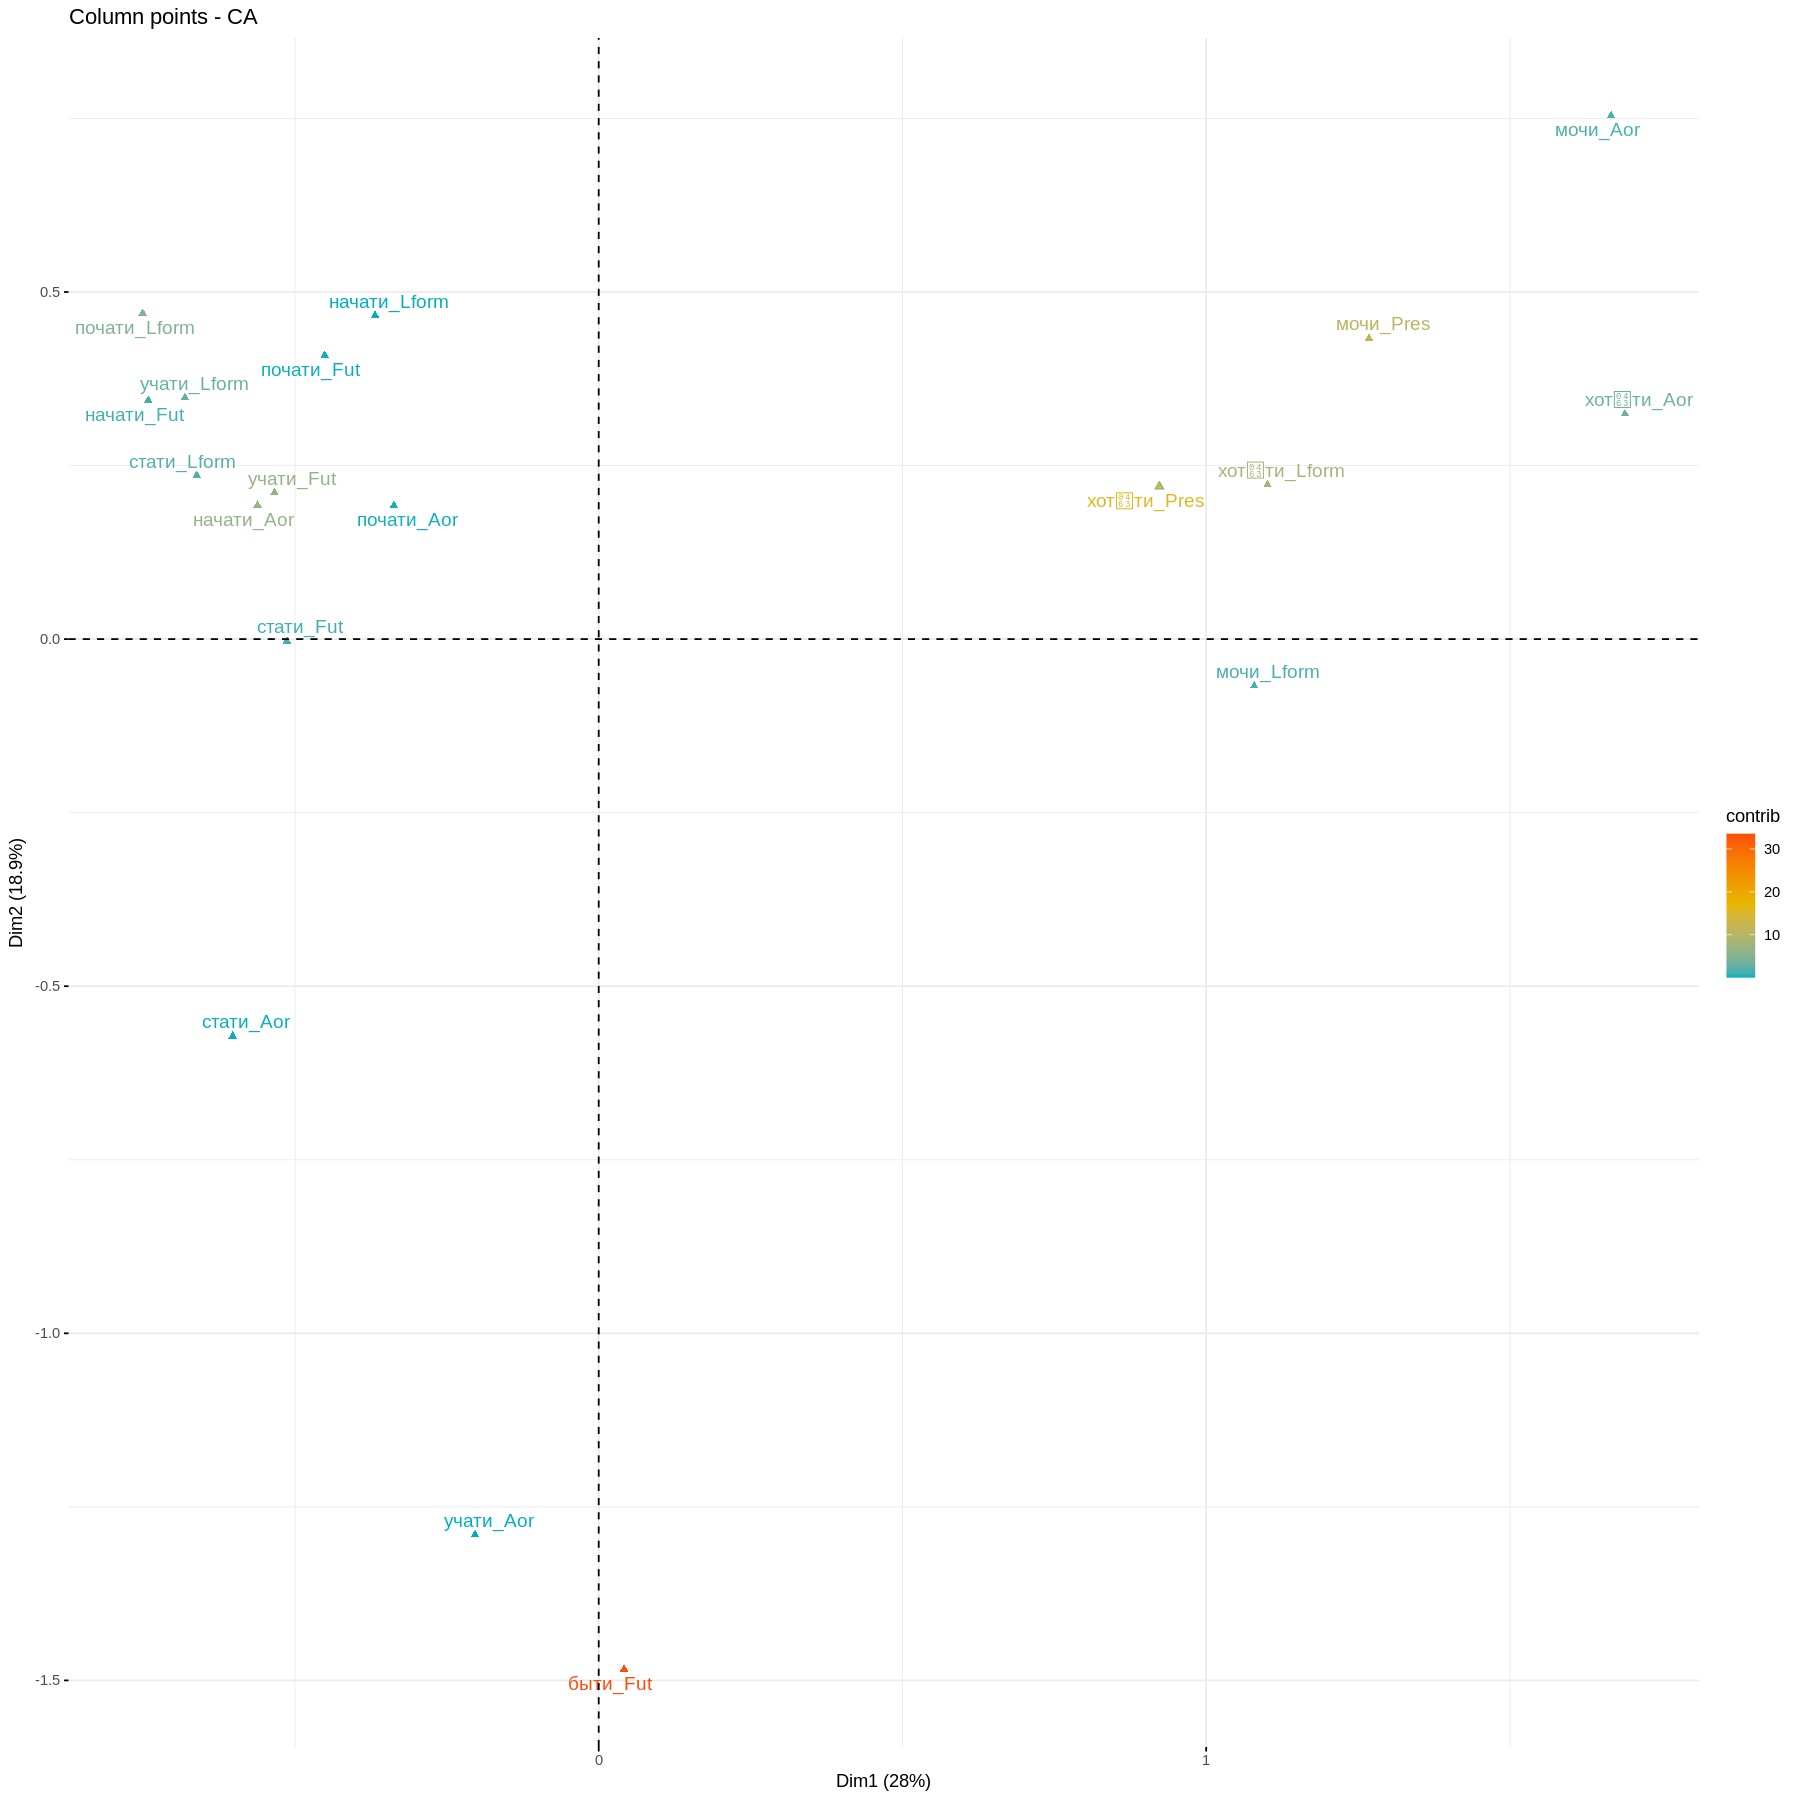

In [27]:
# для лучшей читабельности, т.к. не получилось изменить прозрачность лэйблов
factoextra::fviz_ca_col(ca.model, col.col="contrib", col.row = "black", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE, alpha.col=1, alpha.row=0.3)

## Выводы

Предложите ваш анализ визуализаций, полученных методом Анализа соответствий.

```
- вспомогательные глаголы `мочи` и `хотѣти` чаще употребляются с инфинитивами `сотворити`, `учинити`, `итти`, `дати`, `послати`
- вспомогательные глаголы `почати`, `начати`, `учати` и `стати` чаще употребляются с инфинитивами `говорити`, `воевати`, `пѣти`, `глаголати`, `жити`, `просити`, `бити`, `посылати`, `дѣлати`, `творити`
```

## Дополнительное задание

1. Посчитайте метрику pmi (pointwise mutual information) для сочетания каждой конструкции и каждого инфинитива.
2. Выведите топ-10 пар с наибольшим значением метрики.
3. Визуализируйте данные с помощью коррелограммы, используя функцию corrplot из одноименного пакета.
4. Постройте 2D-визуализацию получившейся таблицы с непрерывными данными, пользуясь Методом главных компонент (PC1 и PC2).
5. Запишите ваши выводы по анализу PCA.
6. Сравните результаты CA и PCA.



### 1. Посчитайте метрику pmi (pointwise mutual information) для сочетания каждой конструкции и каждого инфинитива.

In [35]:
if (!require("svs")) install.packages("svs")
library(svs)

Loading required package: svs

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘svs’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘svs’


The following object is masked from ‘package:vcd’:

    cd_plot




In [68]:
pmi_ <- pmi(as.matrix(infinitives))
pmi_

,быти_Fut,мочи_Aor,мочи_Lform,мочи_Pres,начати_Aor,начати_Fut,начати_Lform,почати_Aor,почати_Fut,почати_Lform,стати_Aor,стати_Fut,стати_Lform,учати_Aor,учати_Fut,учати_Lform,хотѣти_Aor,хотѣти_Lform,хотѣти_Pres
бити,-0.68452849,0.00000000,0.0000000,-3.59495510,0.80894184,-1.83165536,1.094344,0.04703835,1.094344,0.11671187,1.416272,1.28162263,0.17680622,0.000000,-0.1616009,1.33535216,0.000000,0.09434406,-2.1267597
быти,0.00000000,0.00000000,1.2554030,2.35965300,-0.65148756,0.00000000,0.000000,1.41668394,0.000000,-0.04415725,0.000000,0.00000000,0.00000000,0.000000,-2.2944557,-0.82551696,0.000000,-1.17344026,1.3514104
воевати,0.00000000,0.00000000,1.7901798,0.00000000,1.79017978,0.00000000,0.000000,3.34377811,0.000000,-0.50938050,0.000000,-0.16759199,-0.91877144,0.000000,-1.1747164,-1.29074022,0.000000,0.00000000,-1.4674498
глаголати,-1.36712231,0.00000000,-0.3037964,-0.61458391,2.12916304,2.31864084,0.000000,-0.55755296,0.000000,0.00000000,2.396643,0.00000000,0.00000000,0.000000,-3.2686926,0.00000000,0.000000,0.00000000,-1.5614260
говорити,-1.57973371,0.00000000,0.0000000,0.00000000,-0.55293365,-0.15700497,1.447066,-2.18520186,0.000000,2.19525920,0.000000,0.19824581,1.81903513,0.000000,0.3515860,1.51119669,0.000000,-2.03836047,-3.1890749
дати,-1.45534949,0.00000000,1.6079764,1.10454383,0.00000000,0.06048865,0.000000,0.00000000,0.000000,0.00000000,0.000000,0.00000000,-1.10097477,0.000000,-2.3569198,0.00000000,2.664560,2.42706066,1.0873124
держати,-2.20206306,1.82473700,0.0000000,0.45736593,-0.46066522,0.00000000,0.000000,0.19246878,0.000000,-1.85333490,0.000000,0.07341611,-0.26272584,0.000000,0.7292567,-0.04973212,0.000000,0.00000000,0.9959507
дѣлати,0.06272113,0.00000000,0.0000000,-2.50666857,0.42079033,0.00000000,0.000000,2.13532488,0.000000,-0.17351322,0.000000,0.16827530,0.09516775,0.000000,0.1611509,0.04512707,0.000000,-0.30279623,-0.2311182
жаловати,-2.83009428,0.00000000,0.0000000,0.00000000,-0.76676835,0.27070636,0.000000,0.00000000,3.196706,-0.48136613,0.000000,0.00000000,-0.89075706,0.000000,-0.3393471,-1.26272584,0.000000,0.00000000,1.9297984
жити,-1.36712231,0.07471525,0.0000000,-1.61458391,-1.30379637,0.00000000,0.000000,0.00000000,2.074715,-1.28142856,0.000000,-1.26156813,-1.01274759,0.000000,1.9112165,-0.57736144,-1.247213,-1.73263967,-1.1463885


### 2. Выведите топ-10 пар с наибольшим значением метрики.

In [111]:
pmi_long <- data.frame(pmi_) %>%
  rownames_to_column("INF") %>%
    pivot_longer(!INF, names_to = "aux_v", values_to = "pmi_score") %>%
      arrange(desc(pmi_score)) %>%
        slice(1:10)

pmi_long

INF,aux_v,pmi_score
<chr>,<chr>,<dbl>
сотворити,мочи_Aor,4.523356
писати,учати_Aor,4.518634
пѣти,начати_Fut,4.053315
имѣти,мочи_Lform,3.490619
воевати,почати_Aor,3.343778
пѣти,стати_Aor,3.213779
итти,хотѣти_Aor,3.201428
жаловати,почати_Fut,3.196706
сотворити,мочи_Pres,3.155985


### 3. Визуализируйте данные с помощью коррелограммы, используя функцию corrplot из одноименного пакета.

In [112]:
if (!require("corrplot")) install.packages("corrplot")
library(corrplot)

Loading required package: corrplot

corrplot 0.95 loaded



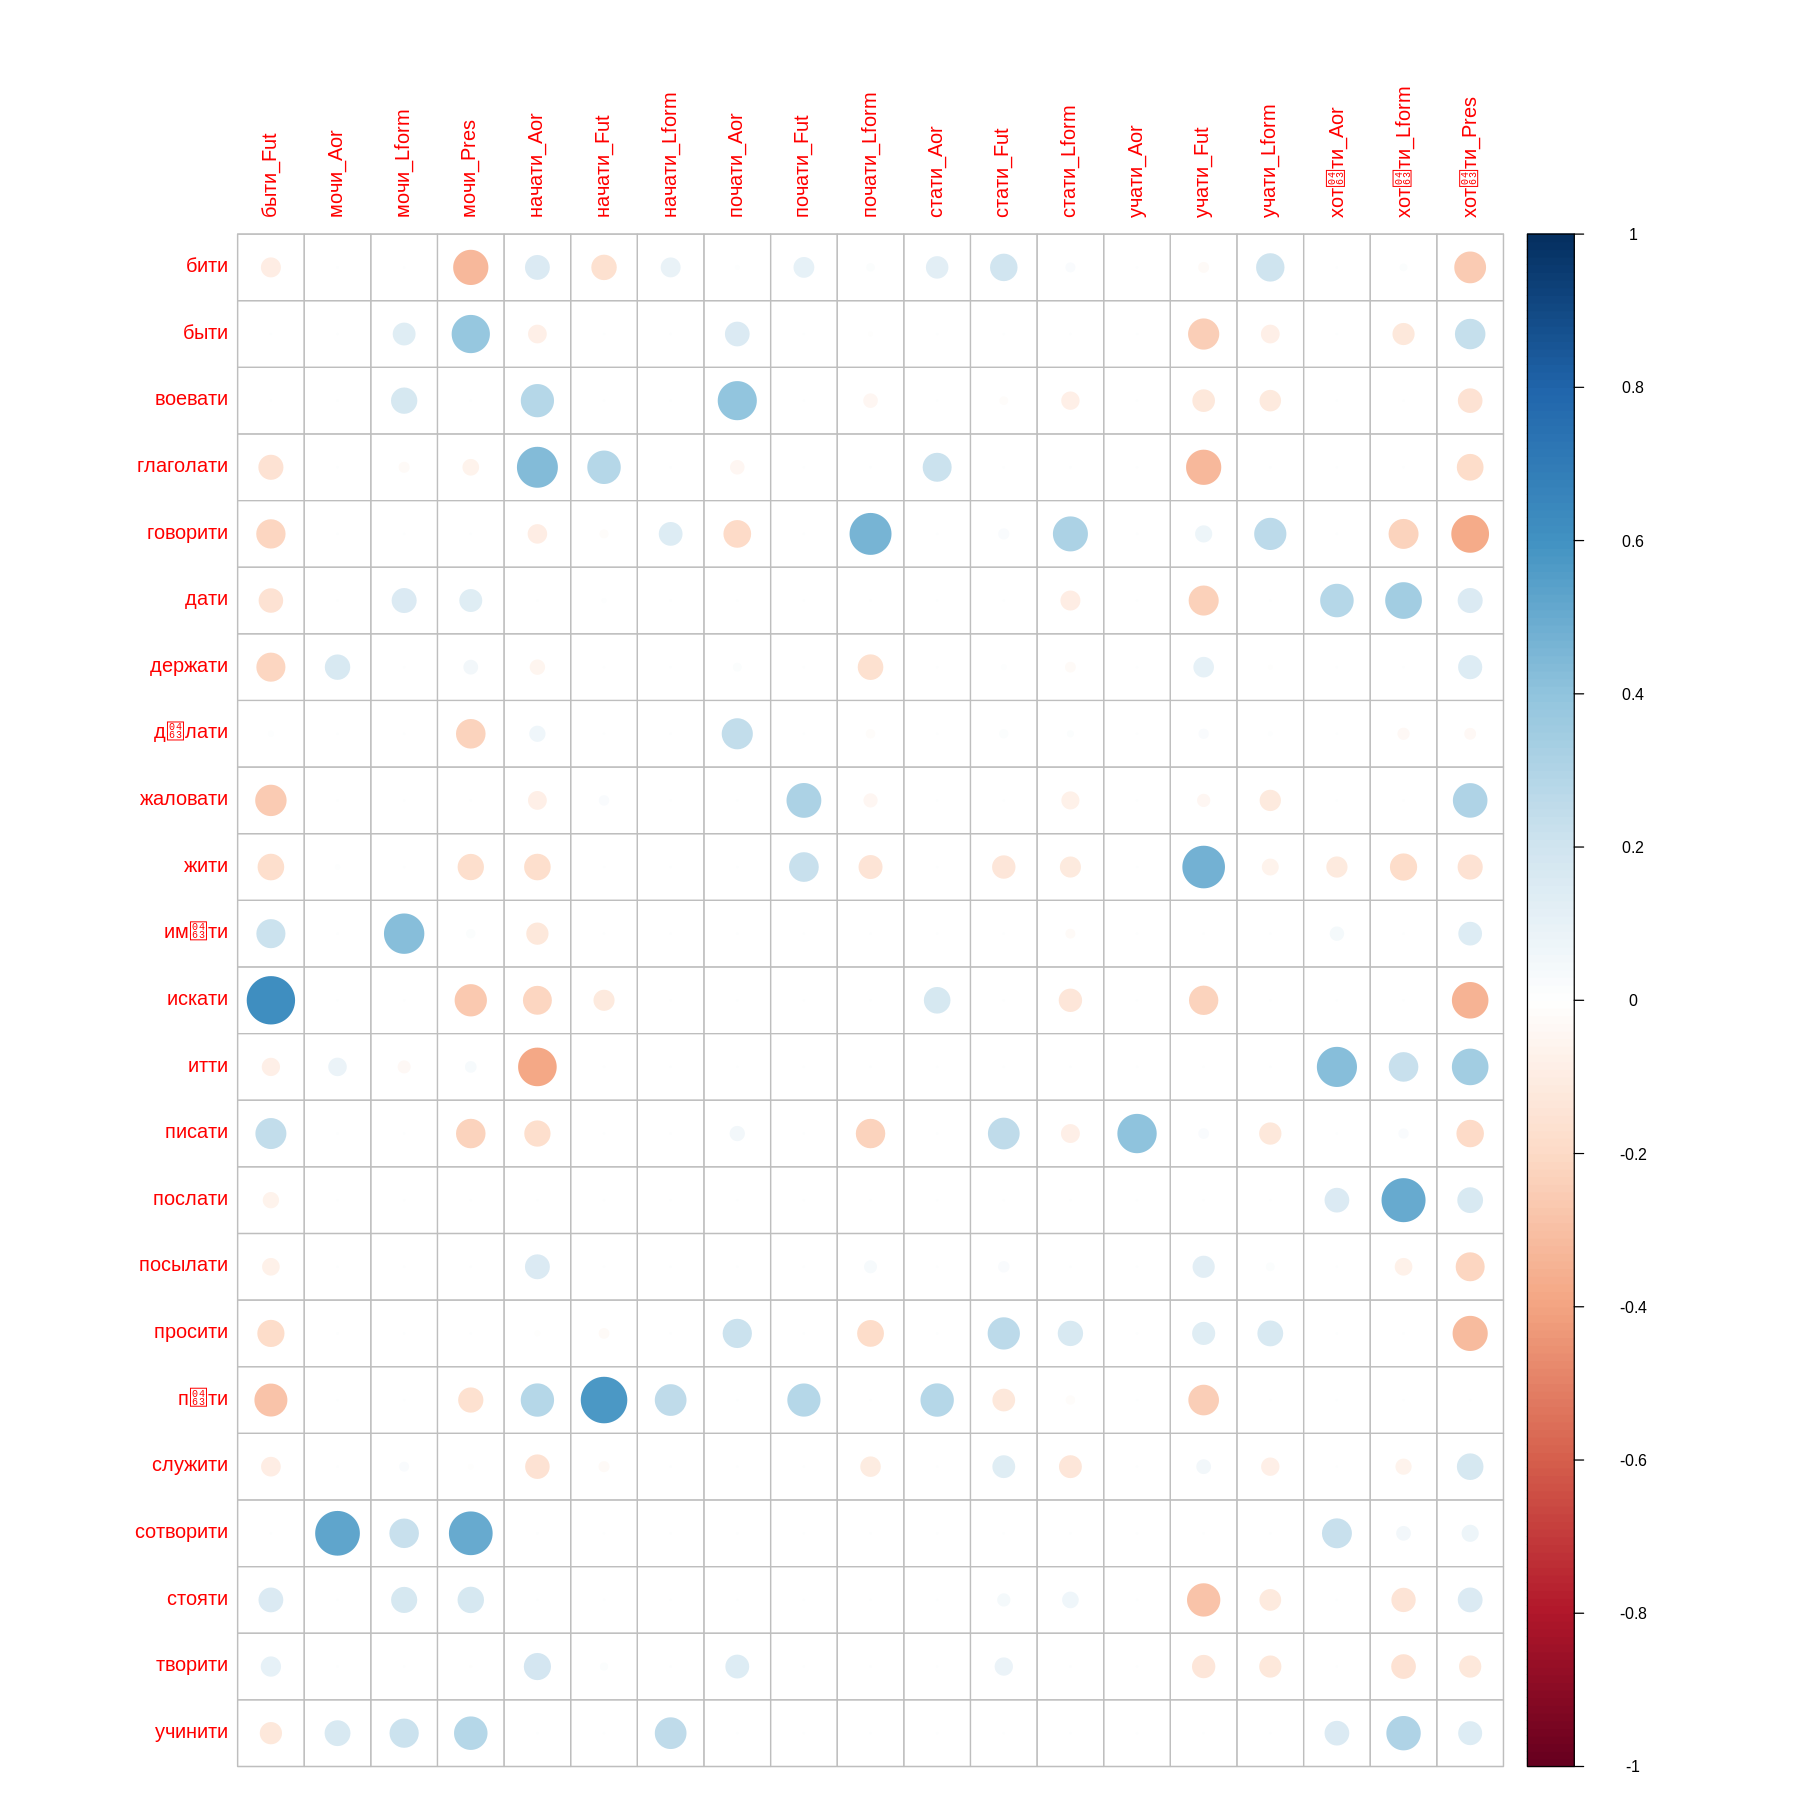

In [121]:
pmi_norm <- pmi(as.matrix(infinitives), normalize = TRUE)

corrplot::corrplot(pmi_norm)

### 4. Постройте 2D-визуализацию получившейся таблицы с непрерывными данными, пользуясь Методом главных компонент (PC1 и PC2).

In [128]:
pmi_norm_var <- PCA(pmi_norm, graph = TRUE)
pmi_norm_var

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 19 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

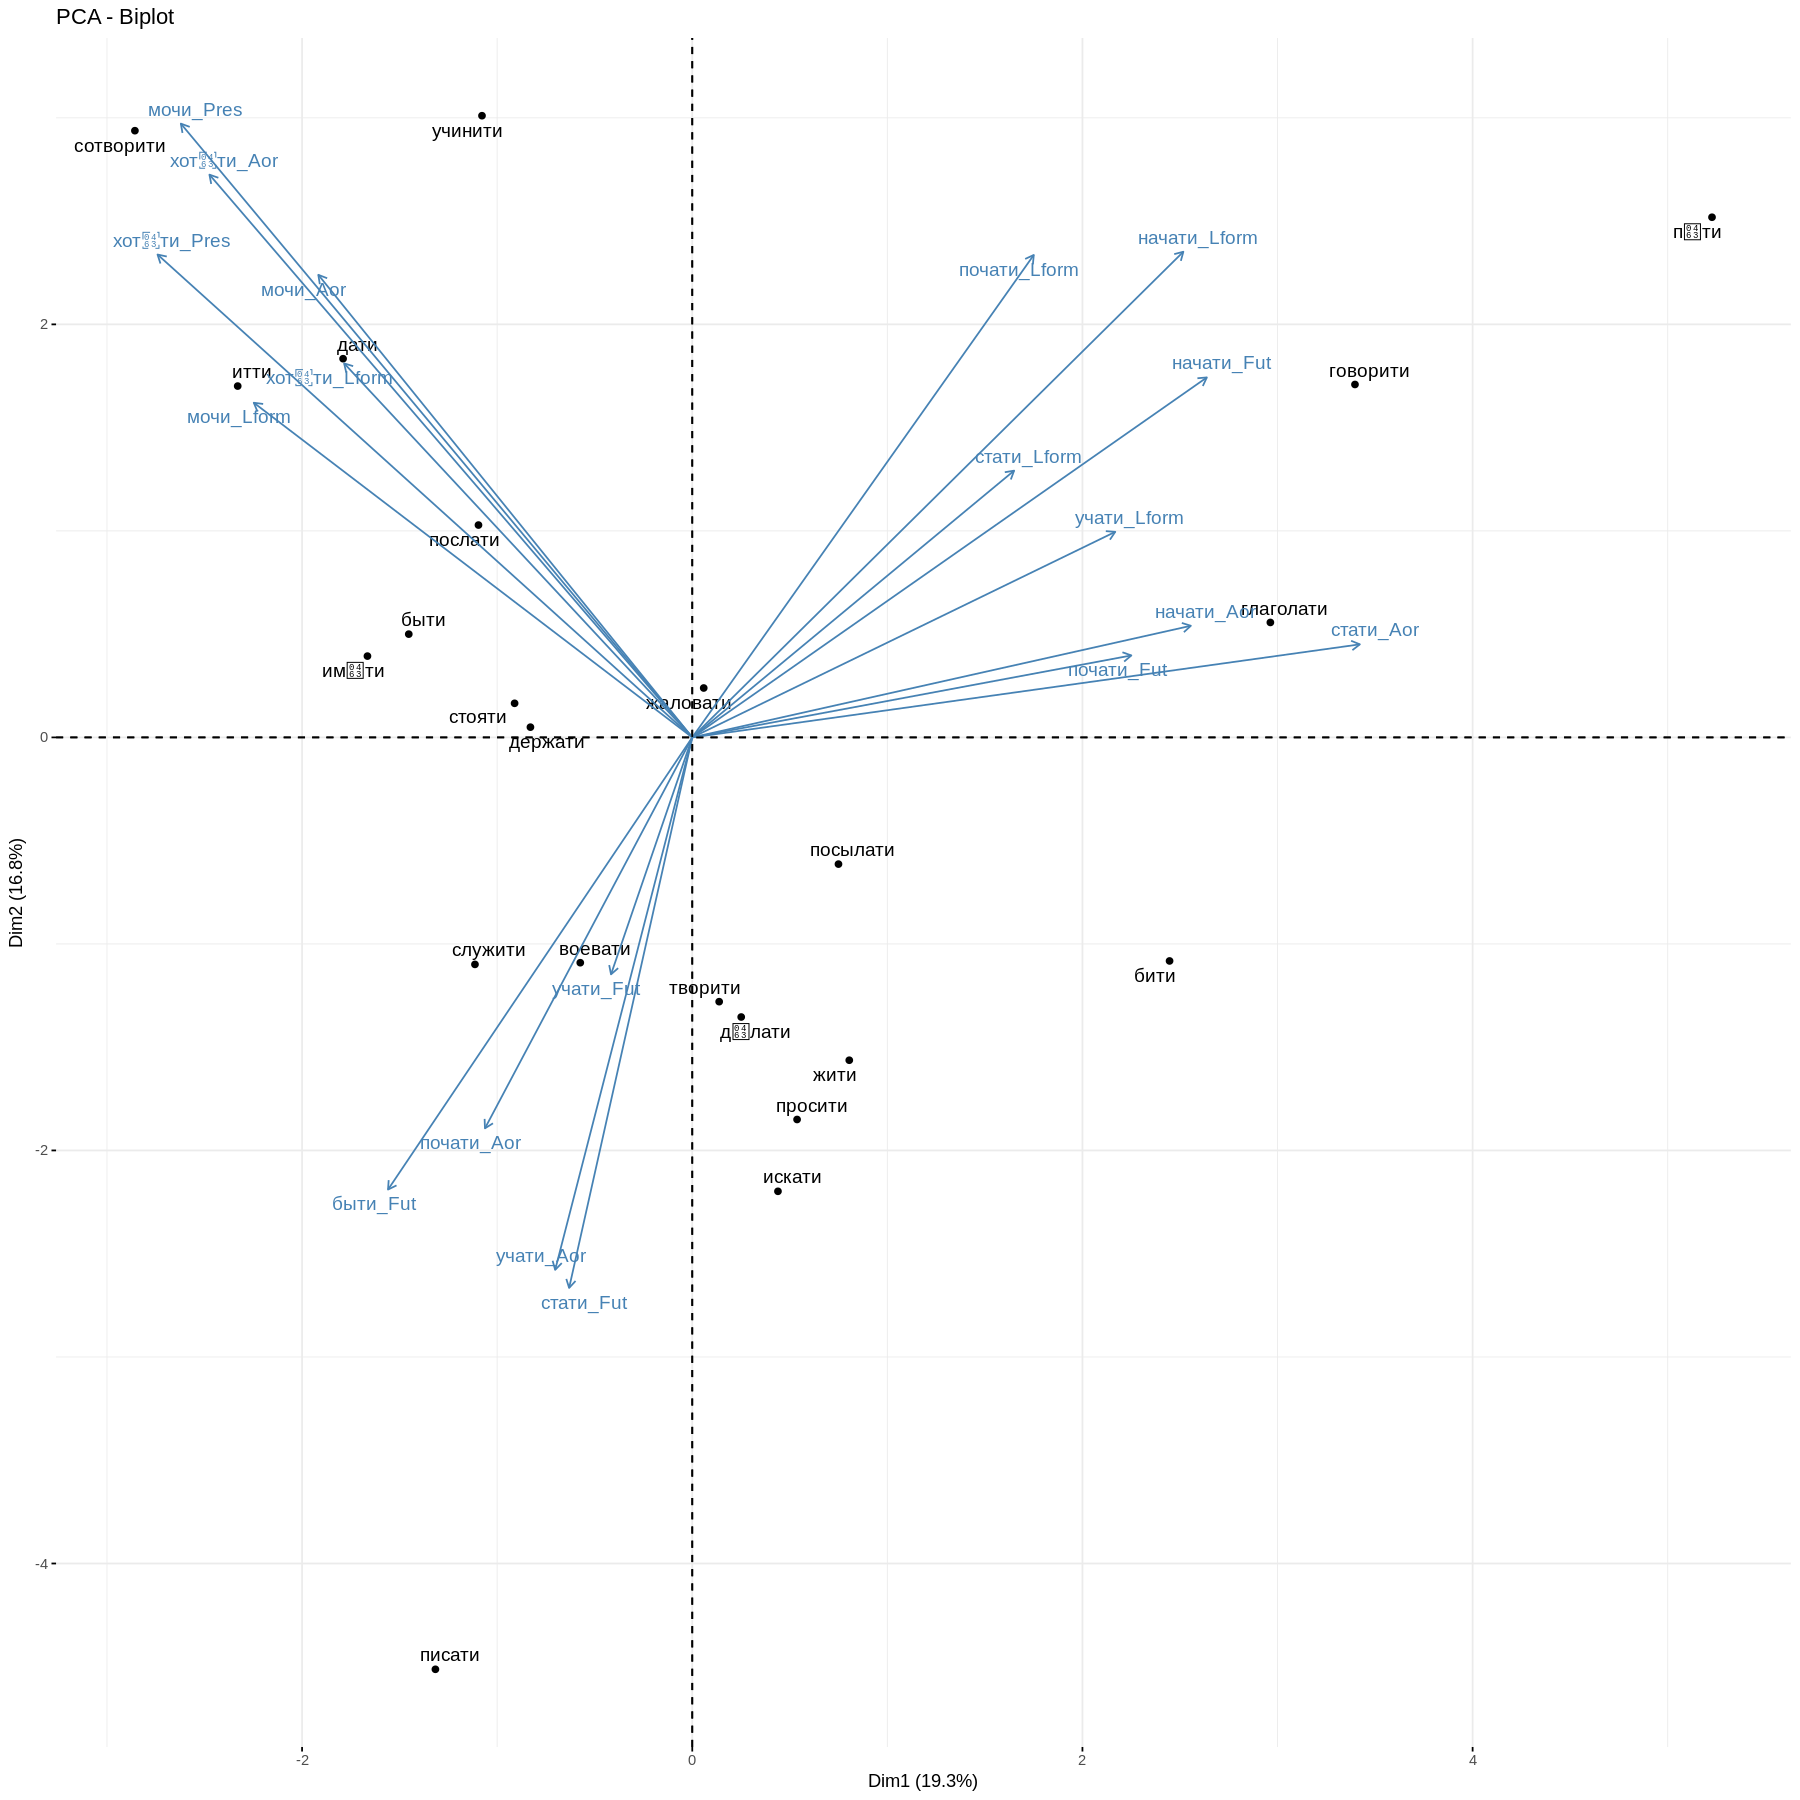

In [135]:
factoextra::fviz_pca_biplot(
  pmi_norm_var,
  col.col="contrib",
  col.row = "black",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE,
  alpha.col=1,
  alpha.row=0.3)

### 5. Запишите ваши выводы по анализу PCA.

```
PC1 составляет 19.3% дисперсии, PC2 -- 16.8%.
Также мы видим кластеры вспомогательных глаголов:
1) учати, почати, быти
2) начати, почати, стати, учати
3) мочи, хотѣти
```

### 6. Сравните результаты CA и PCA.

```
На графике CA были отчетливо видны два кластера, тогда как на графике PCA их три.
Общим для обоих графиков является кластер из вспомогательных глаголов "мочи" и "хотѣти".
```

Полезные ссылки:
- https://statsandr.com/blog/chi-square-test-of-independence-in-r/
- https://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/113-ca-correspondence-analysis-in-r-essentials/